# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
### Your code here

bike_rental = pd.read_csv("SeoulBikeData.csv")

# (1) load the data structure, taking a peak into the top 5 rows
bike_rental.head()

# Note: Each row represents an hour of each day. There are 14 features visible below in the column headers.

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [3]:
# (2) load a description of the data
bike_rental.info()

# Note: There are 8760 instances in the dataset, which, according to Géron (48), is quite small by ML standards. I should note that there are null values present
# in Wind speed, Dew point temperature, and Rainfall, given their non-null counts are less than the total instances (8760). 
# These null values will need to be handled in short order. Some of the features with non-numerical object data types may also need to be dealt with at some stage
# and converted to integers or boolean values, but that remains to be seen.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
# load the categories for Seasons
bike_rental["Seasons"].value_counts()

# Note: Assumption is that there are four categories for the four seasons. Nonetheless, I wanted to load their names to check for "Autmumn" vs. "Fall"
# in case that becomes relevant.

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [5]:
# load a summary of numerical attributes
bike_rental.describe()

# Note: Checking here for unusual values that may appear in the data. Temperature has a max value of 195 which is implausible. 
# The min and max values for Humidity cannot go below 0 for the min and over 100 for max. Wind speed has a max value of 991, also implausible. 
# The min value for Visibility is 27. Visibility cannot go below 0.

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


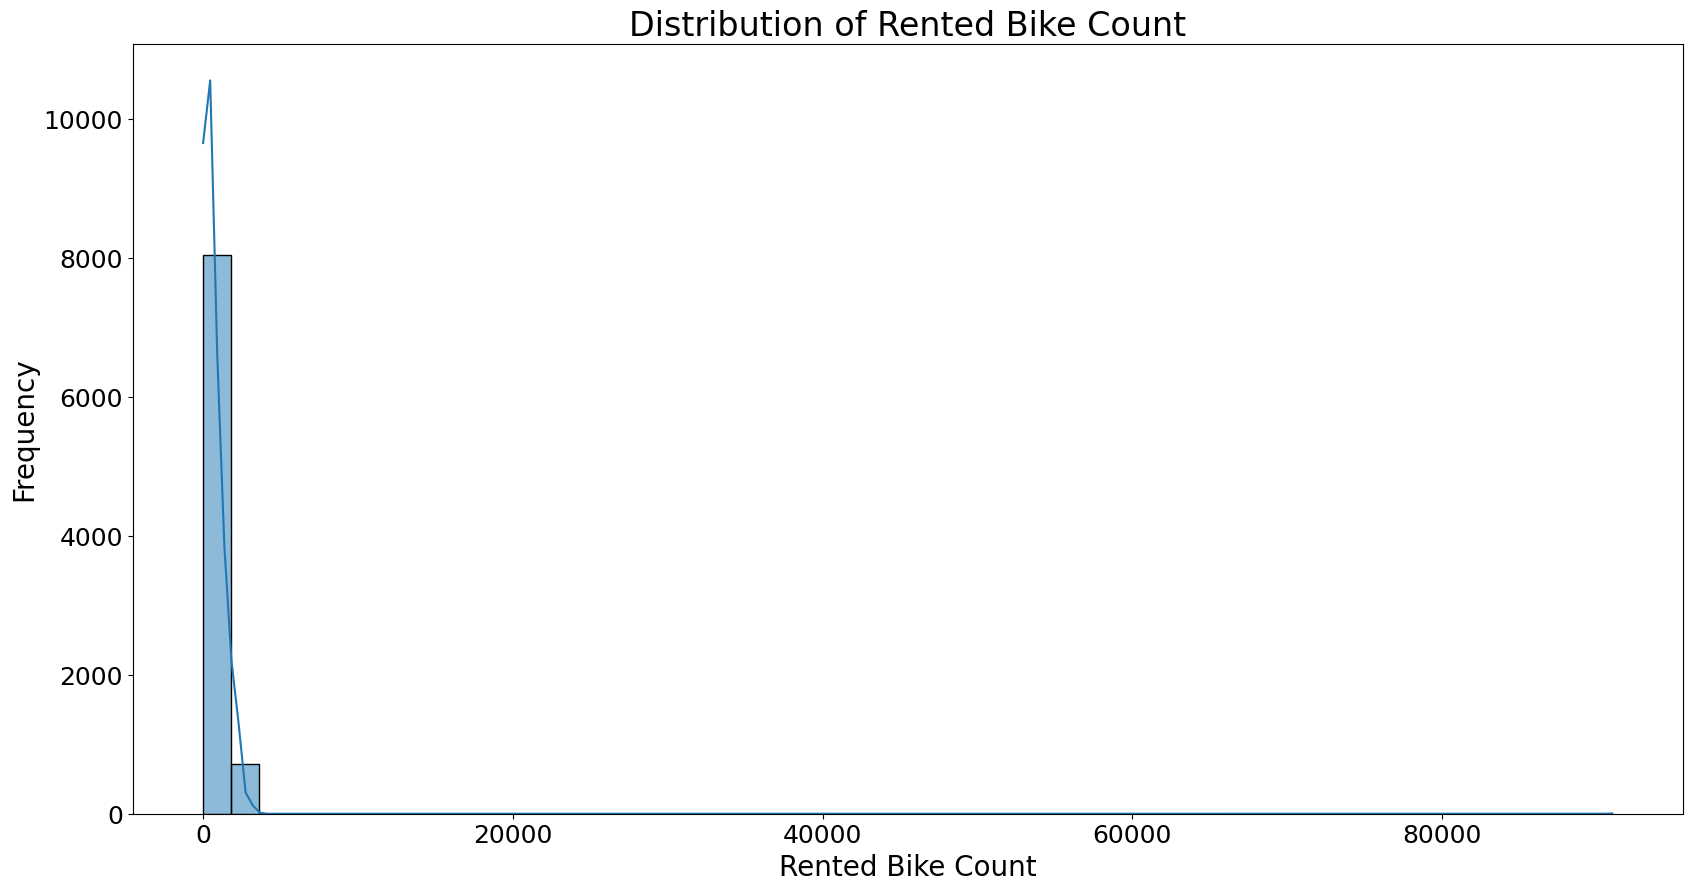

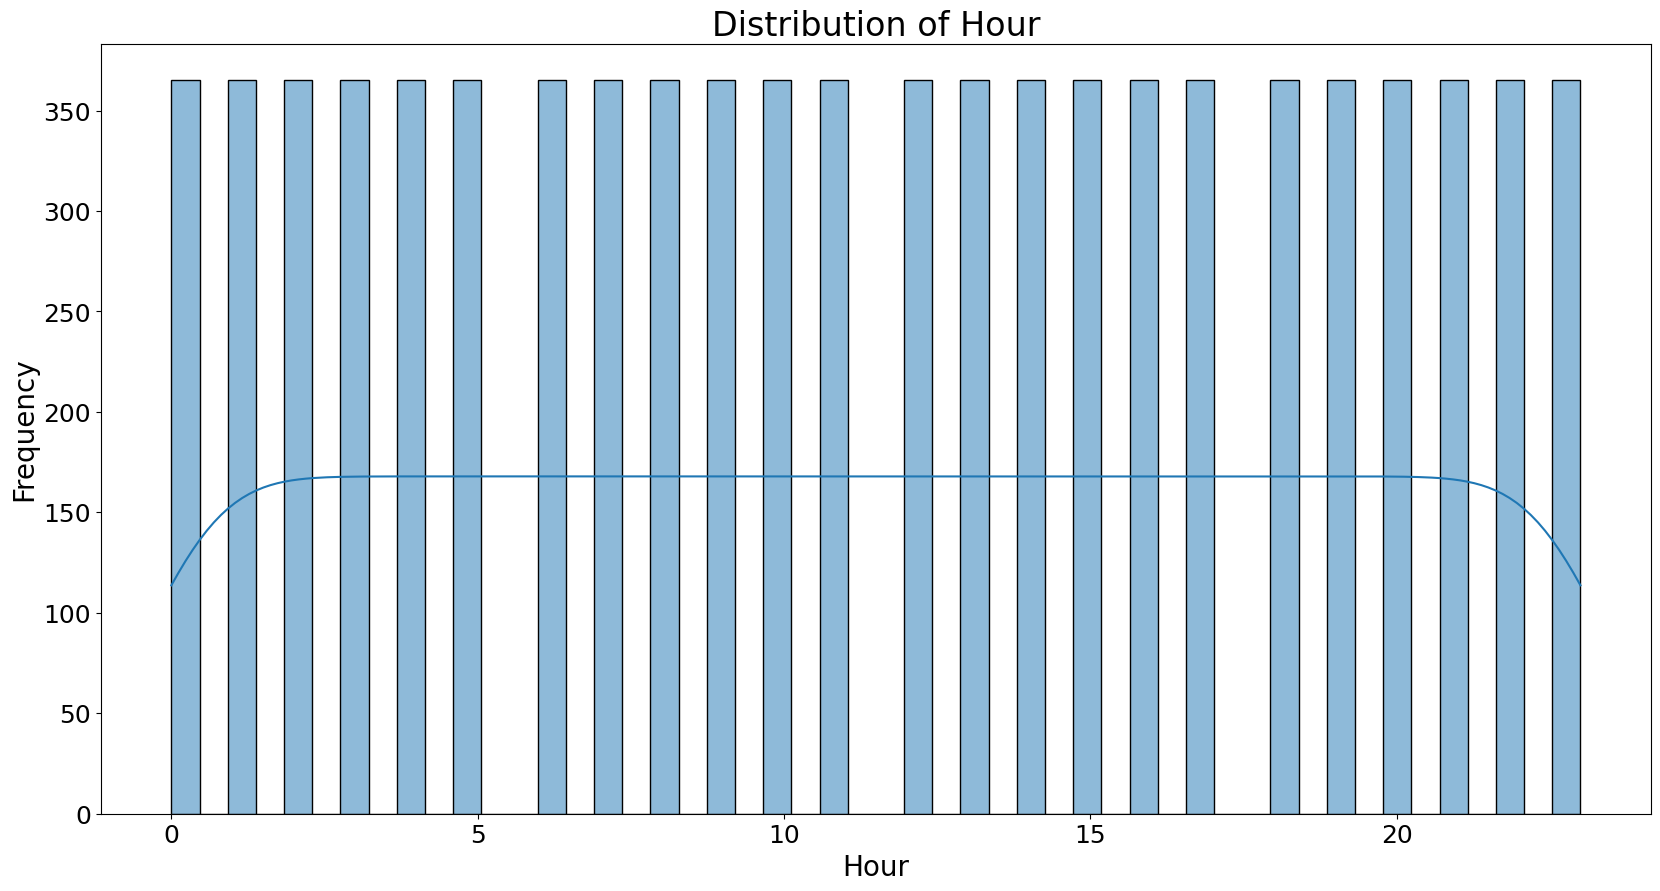

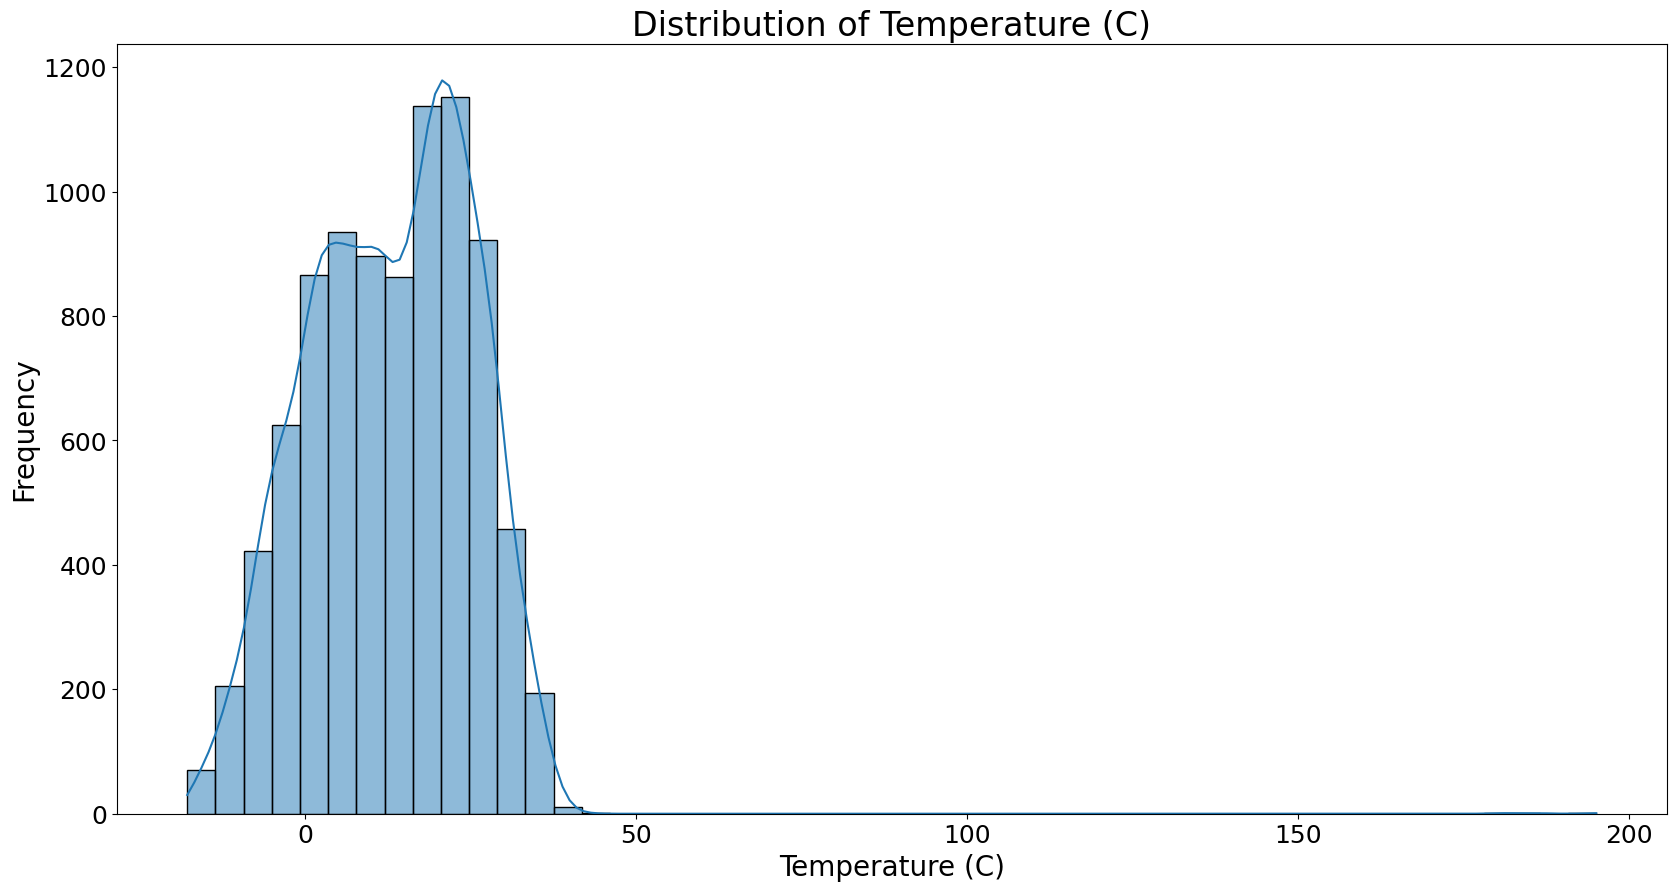

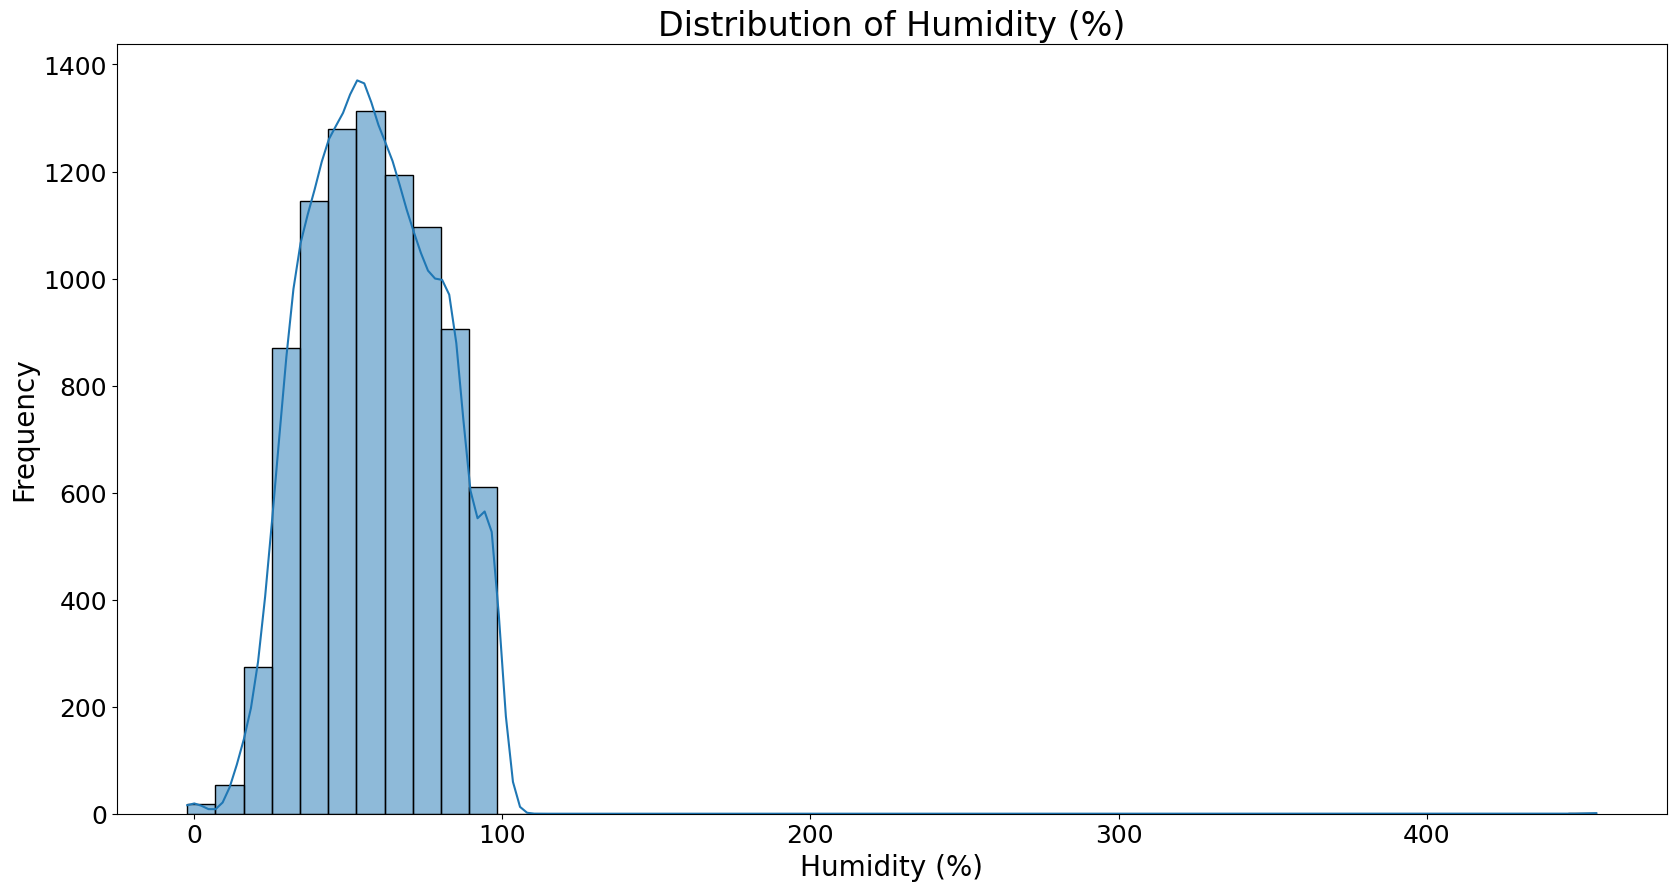

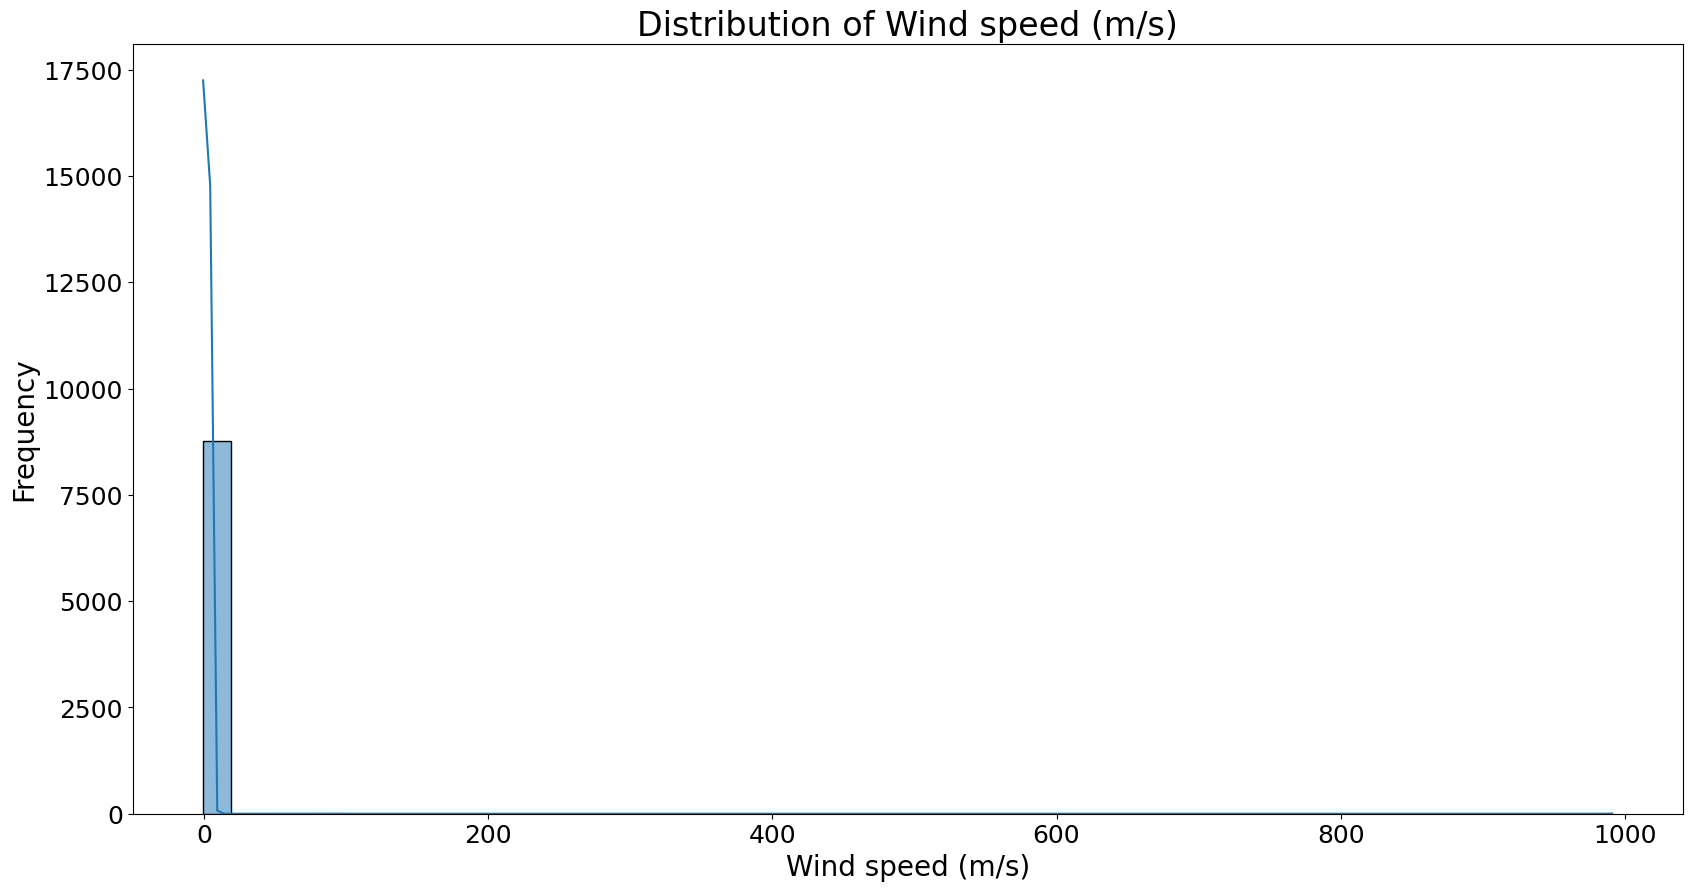

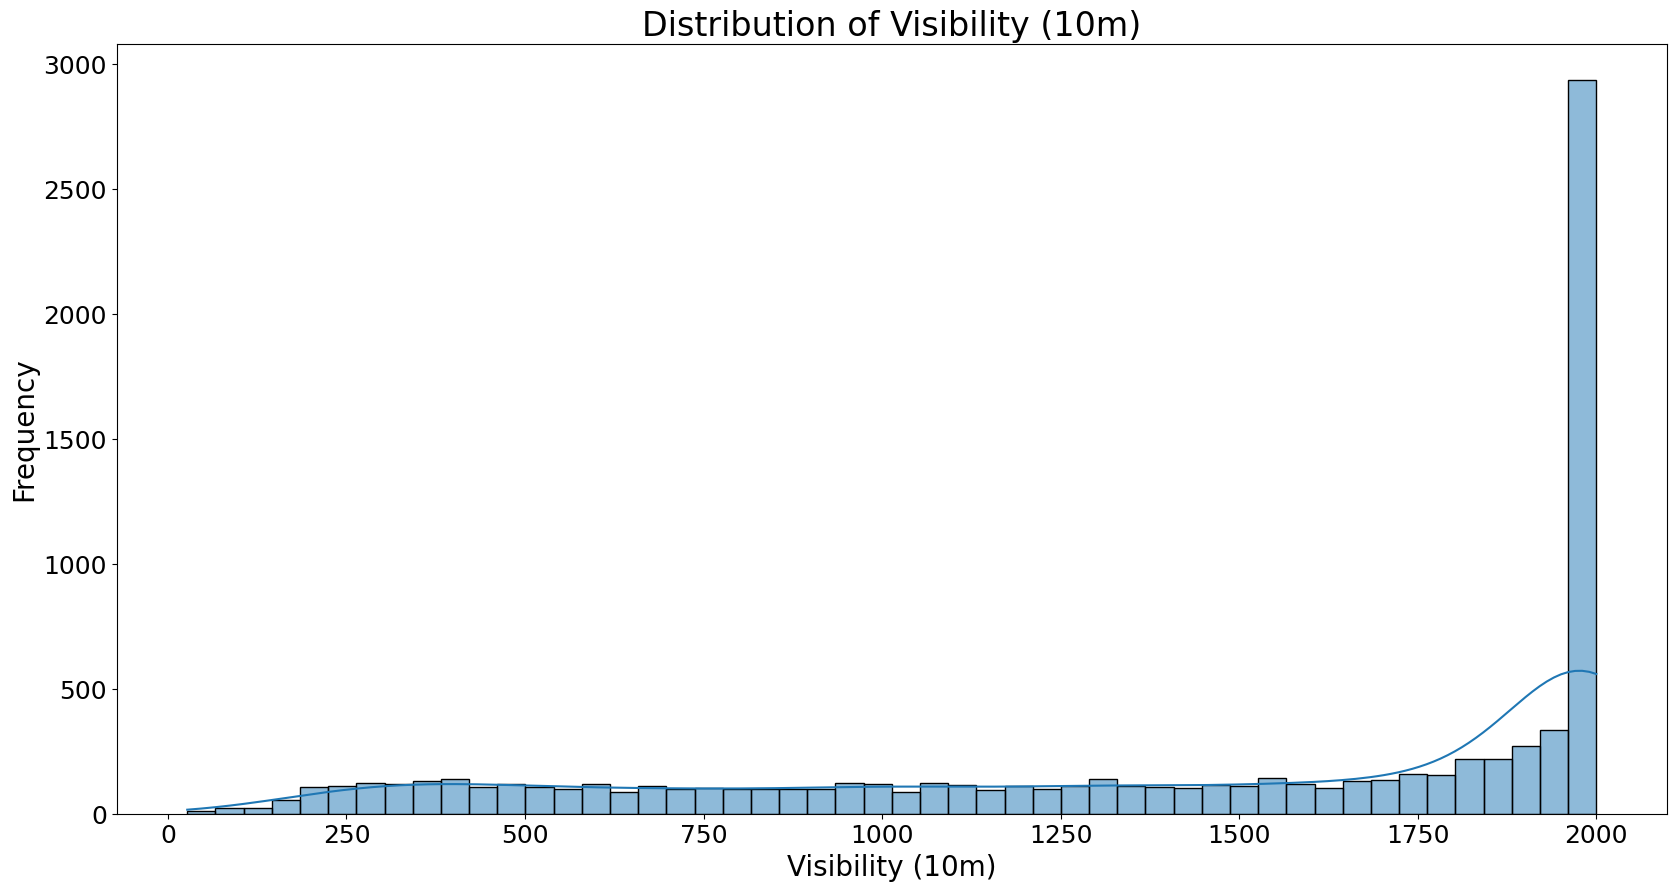

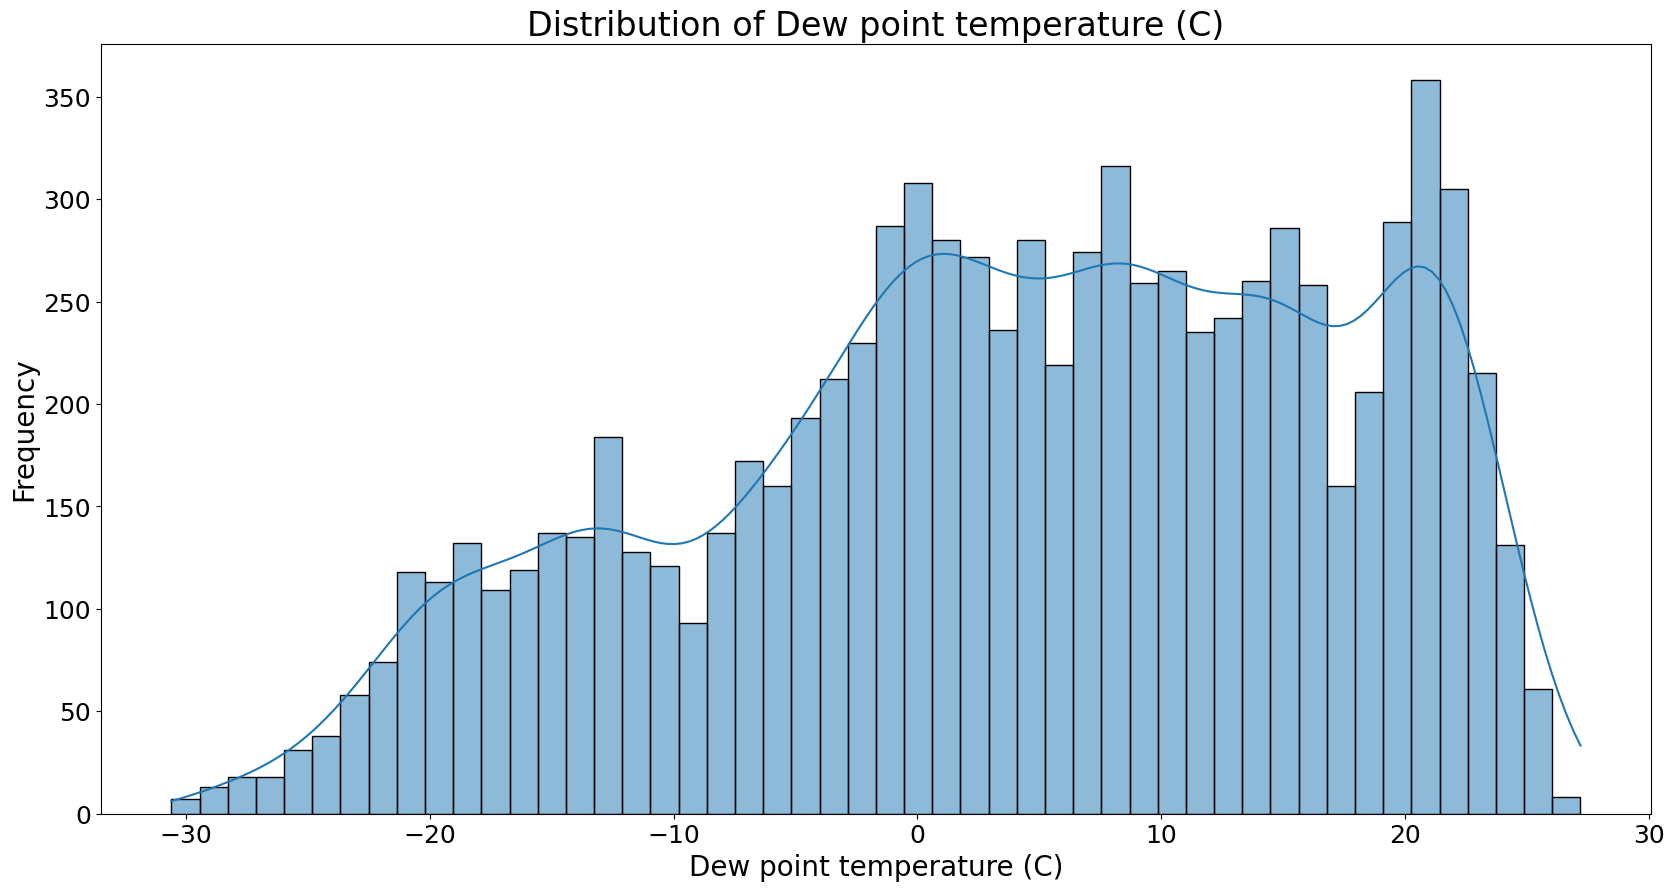

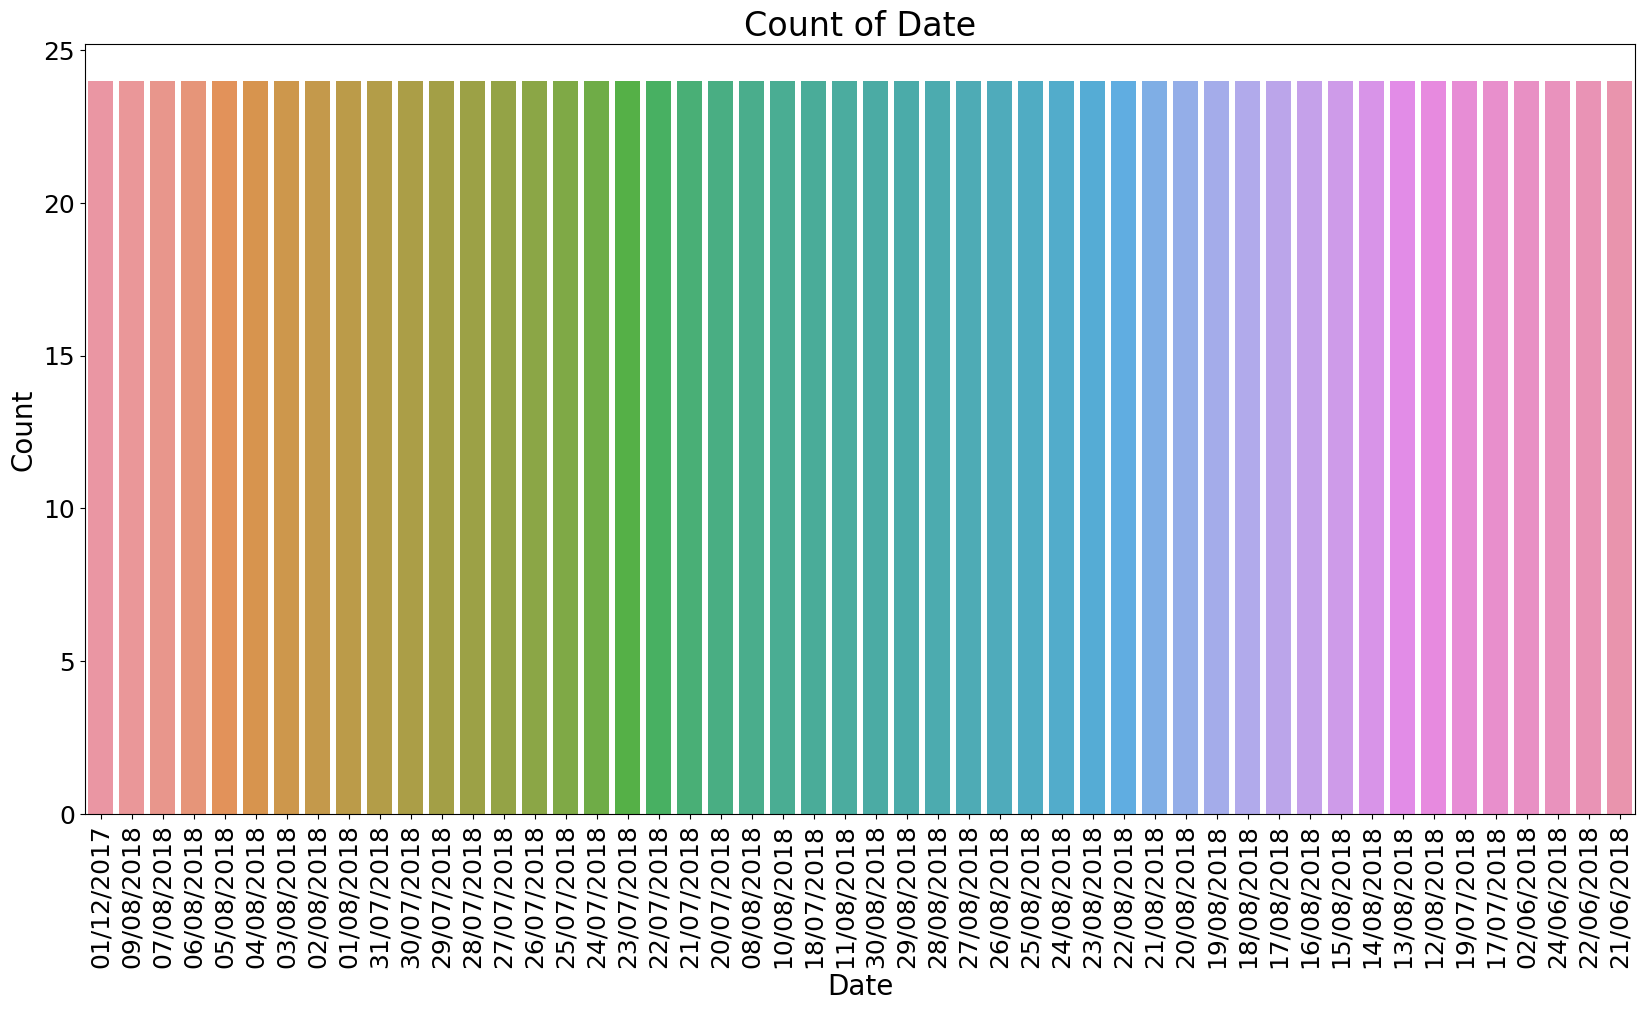

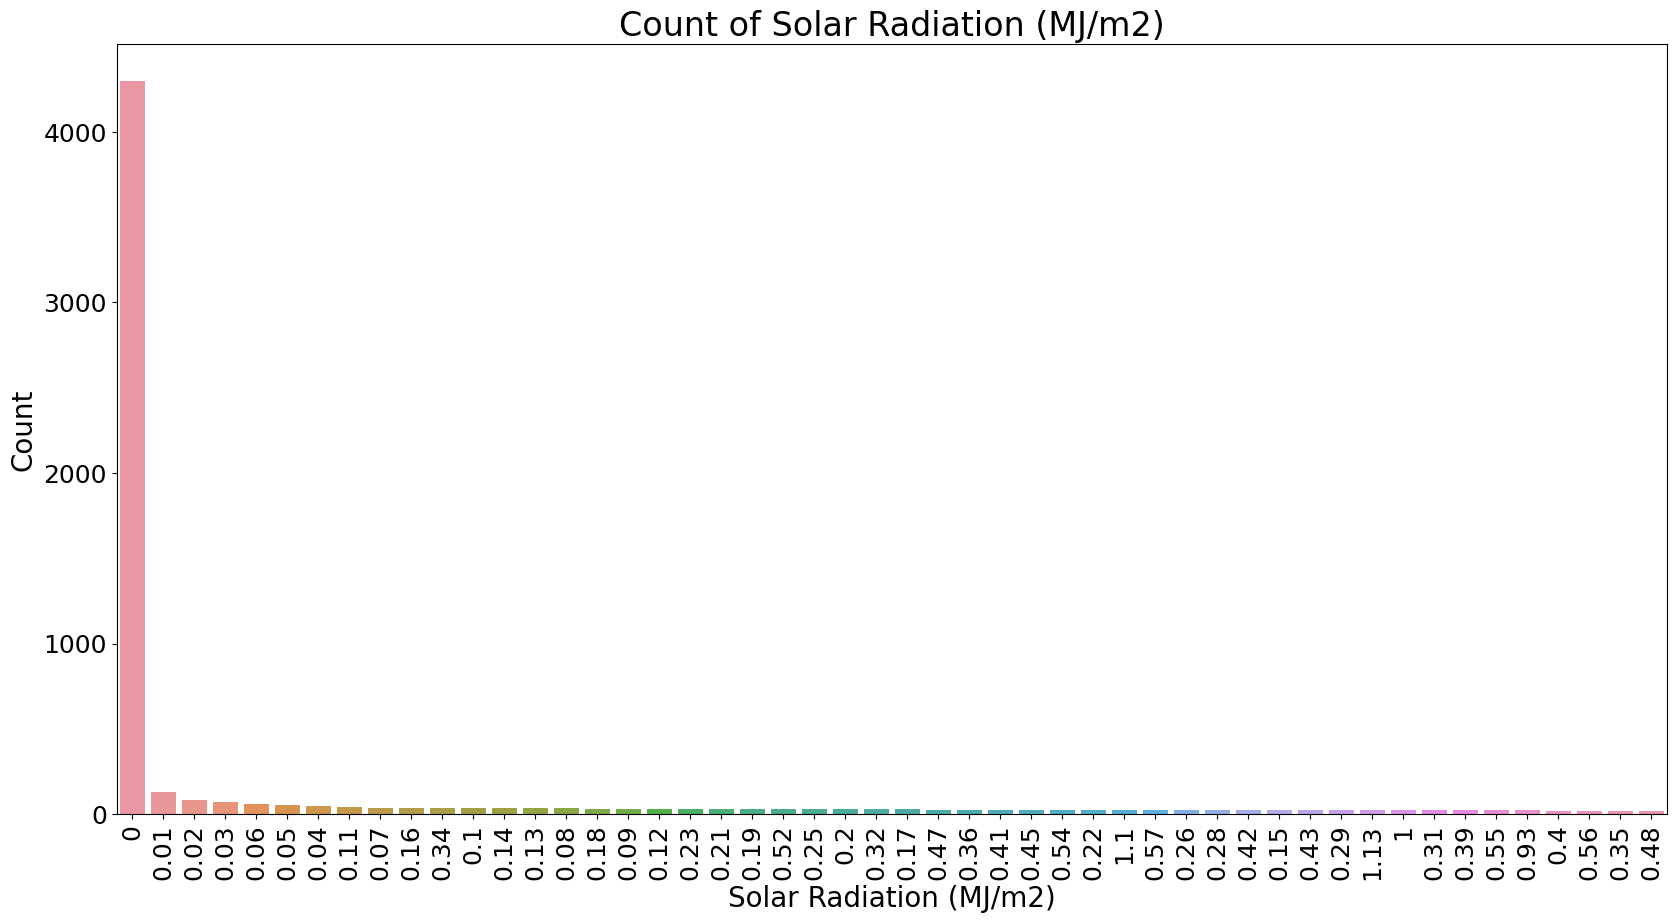

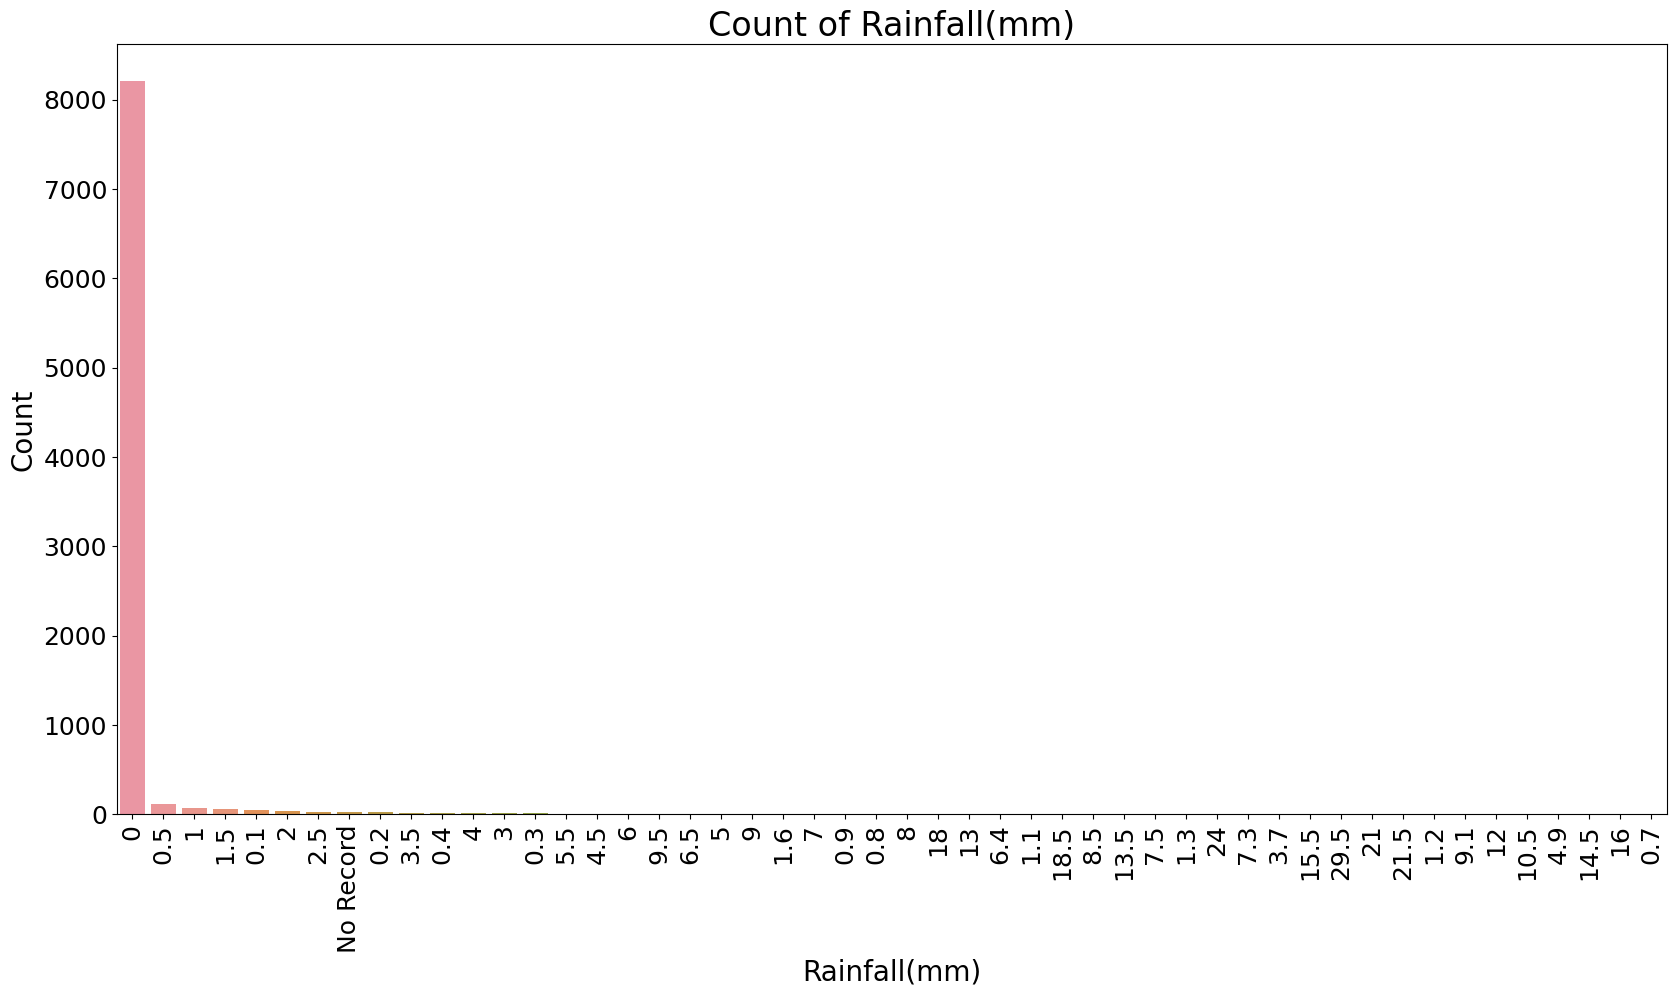

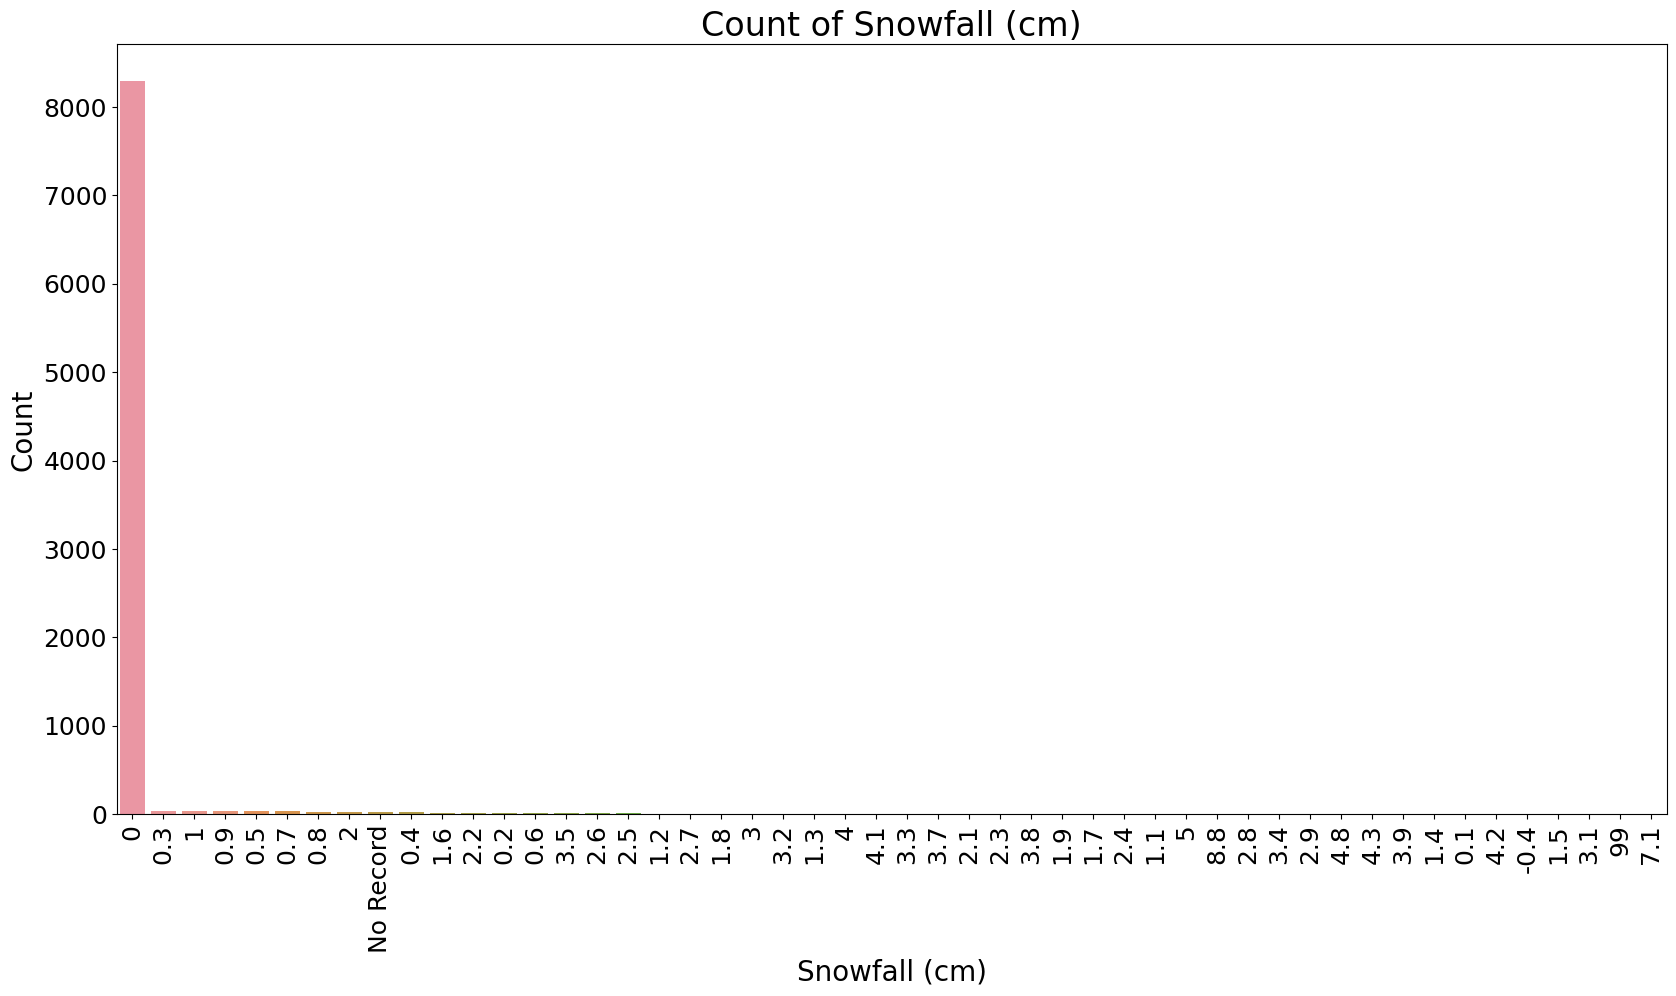

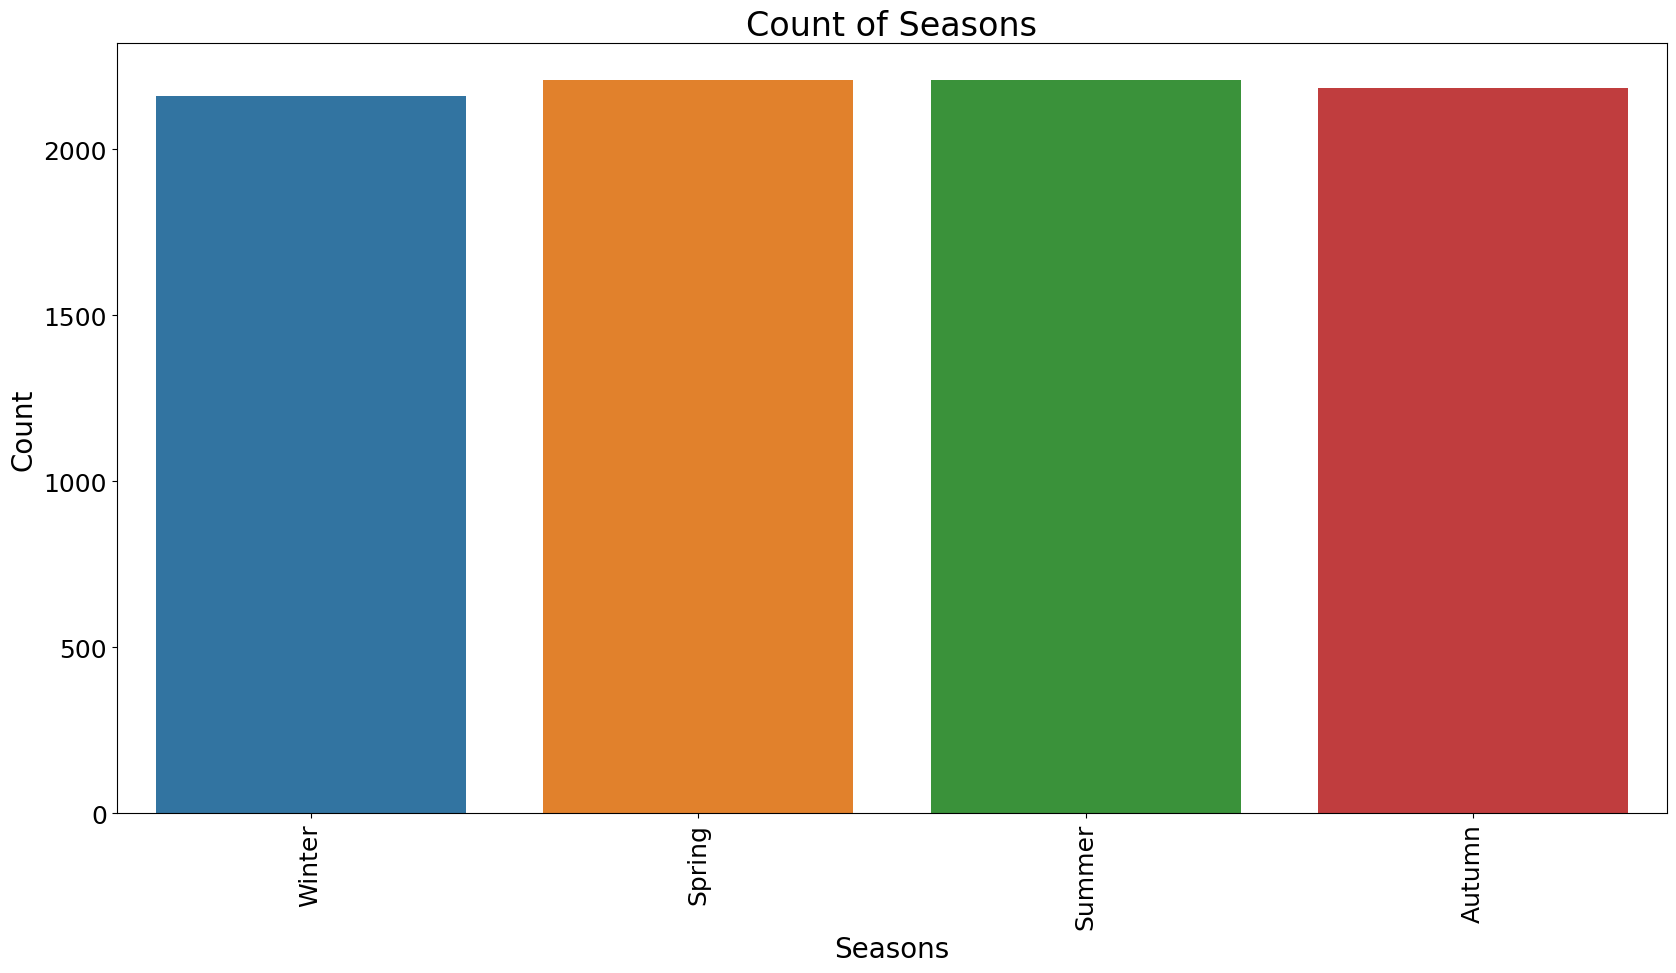

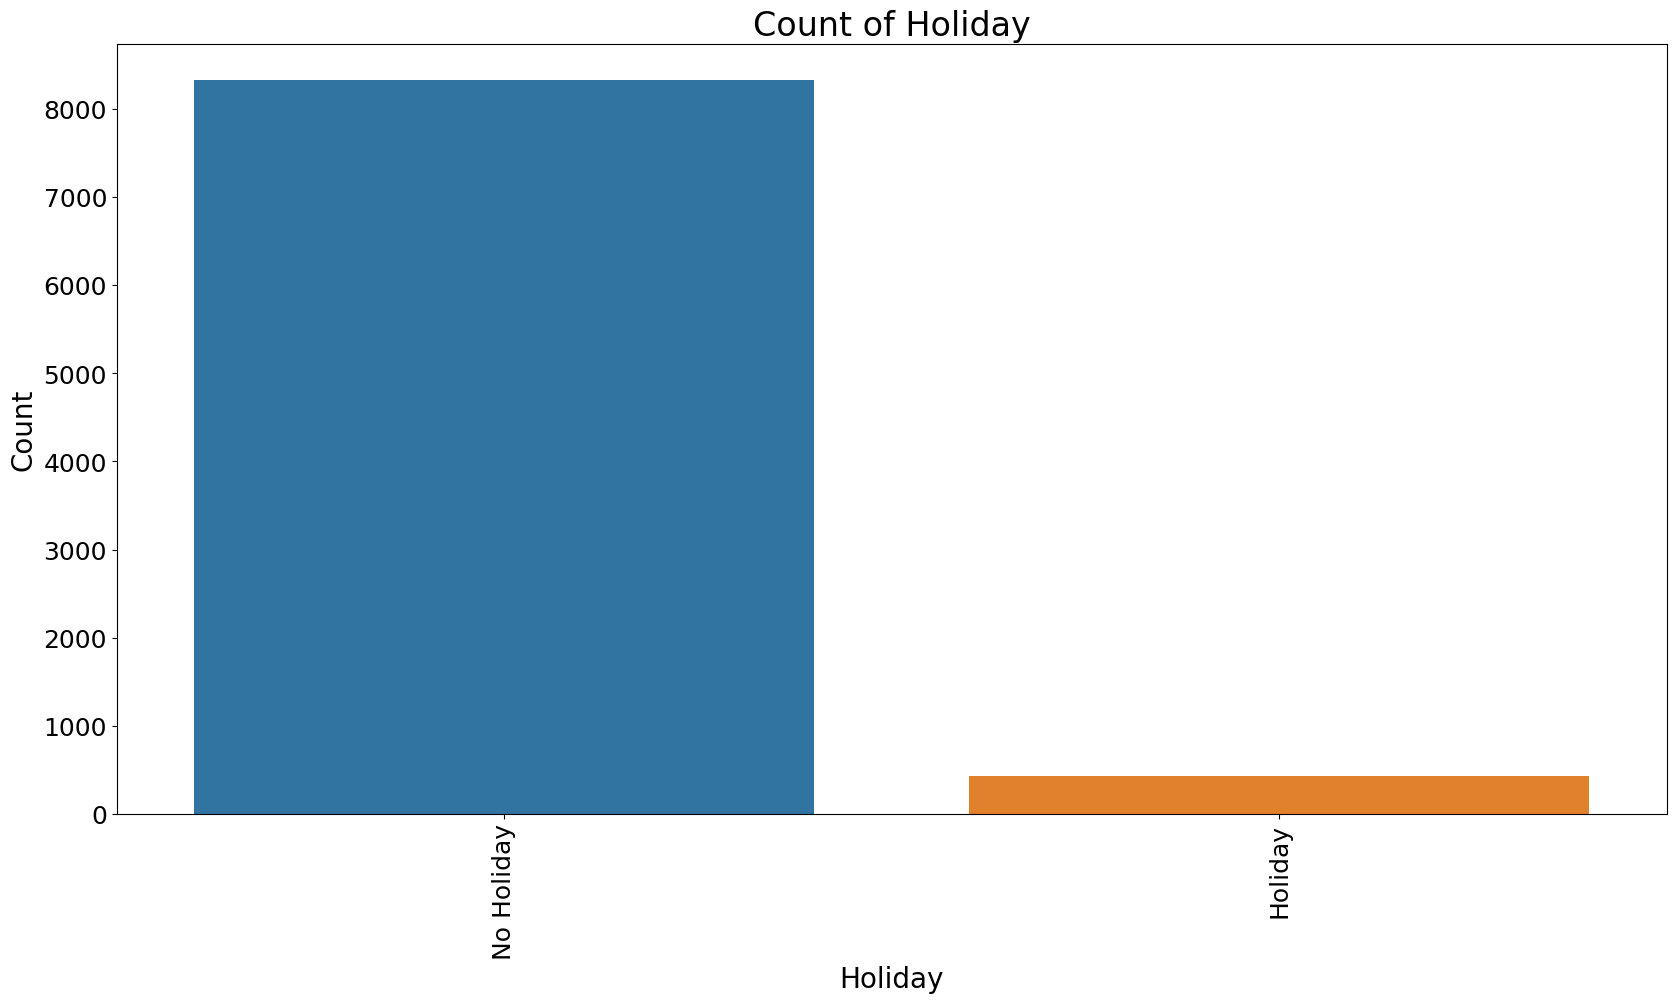

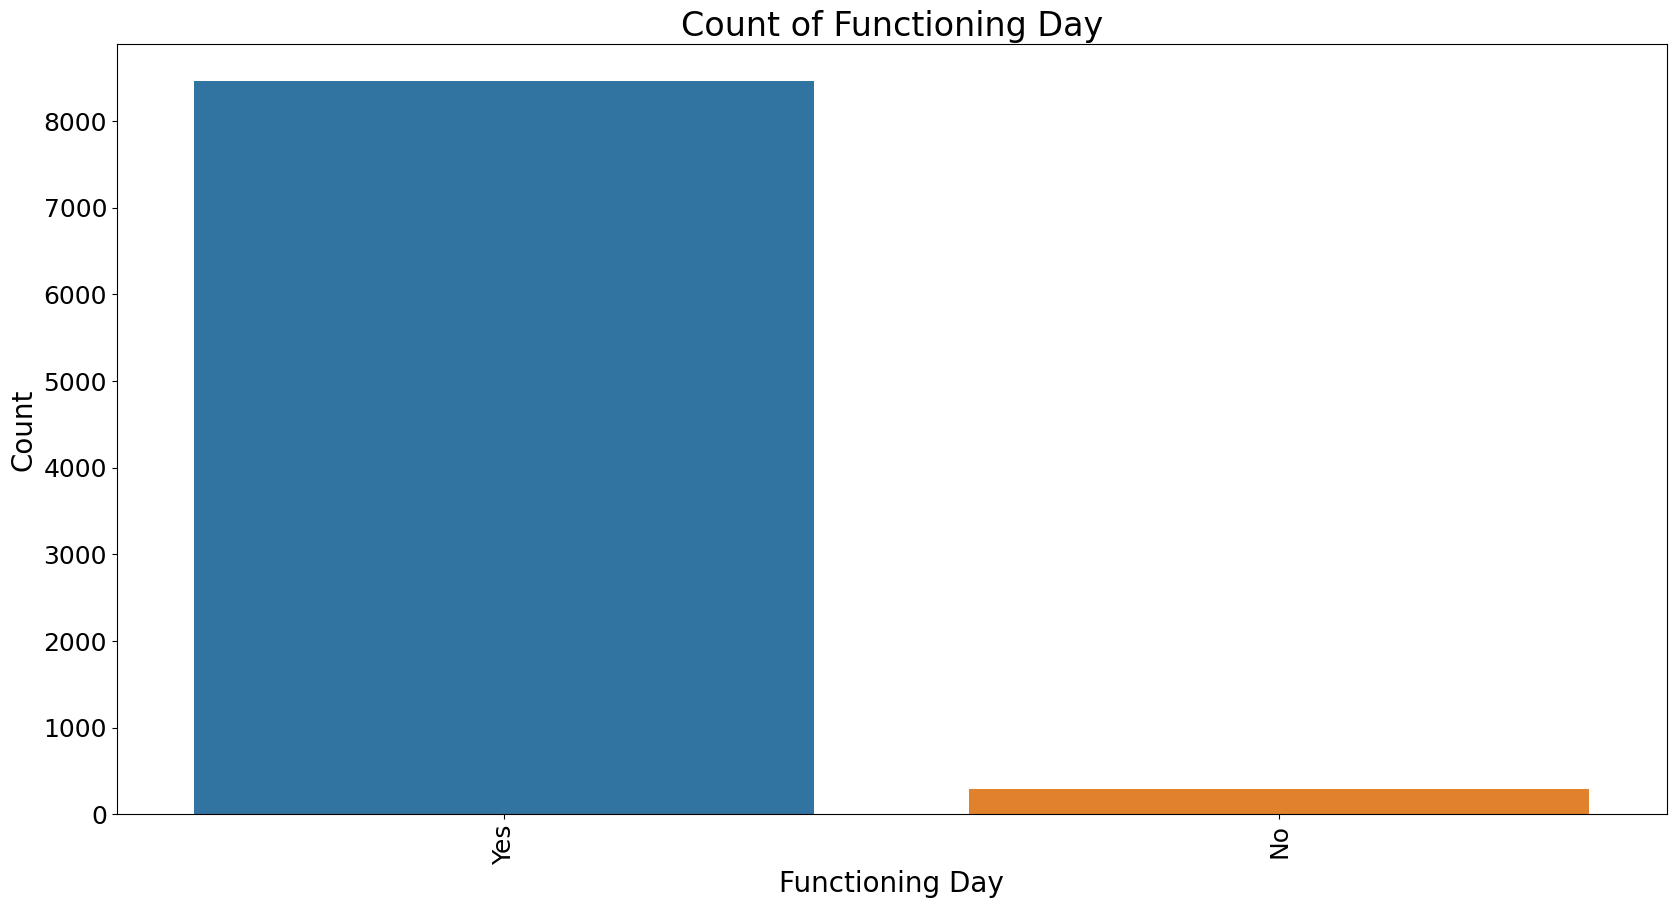

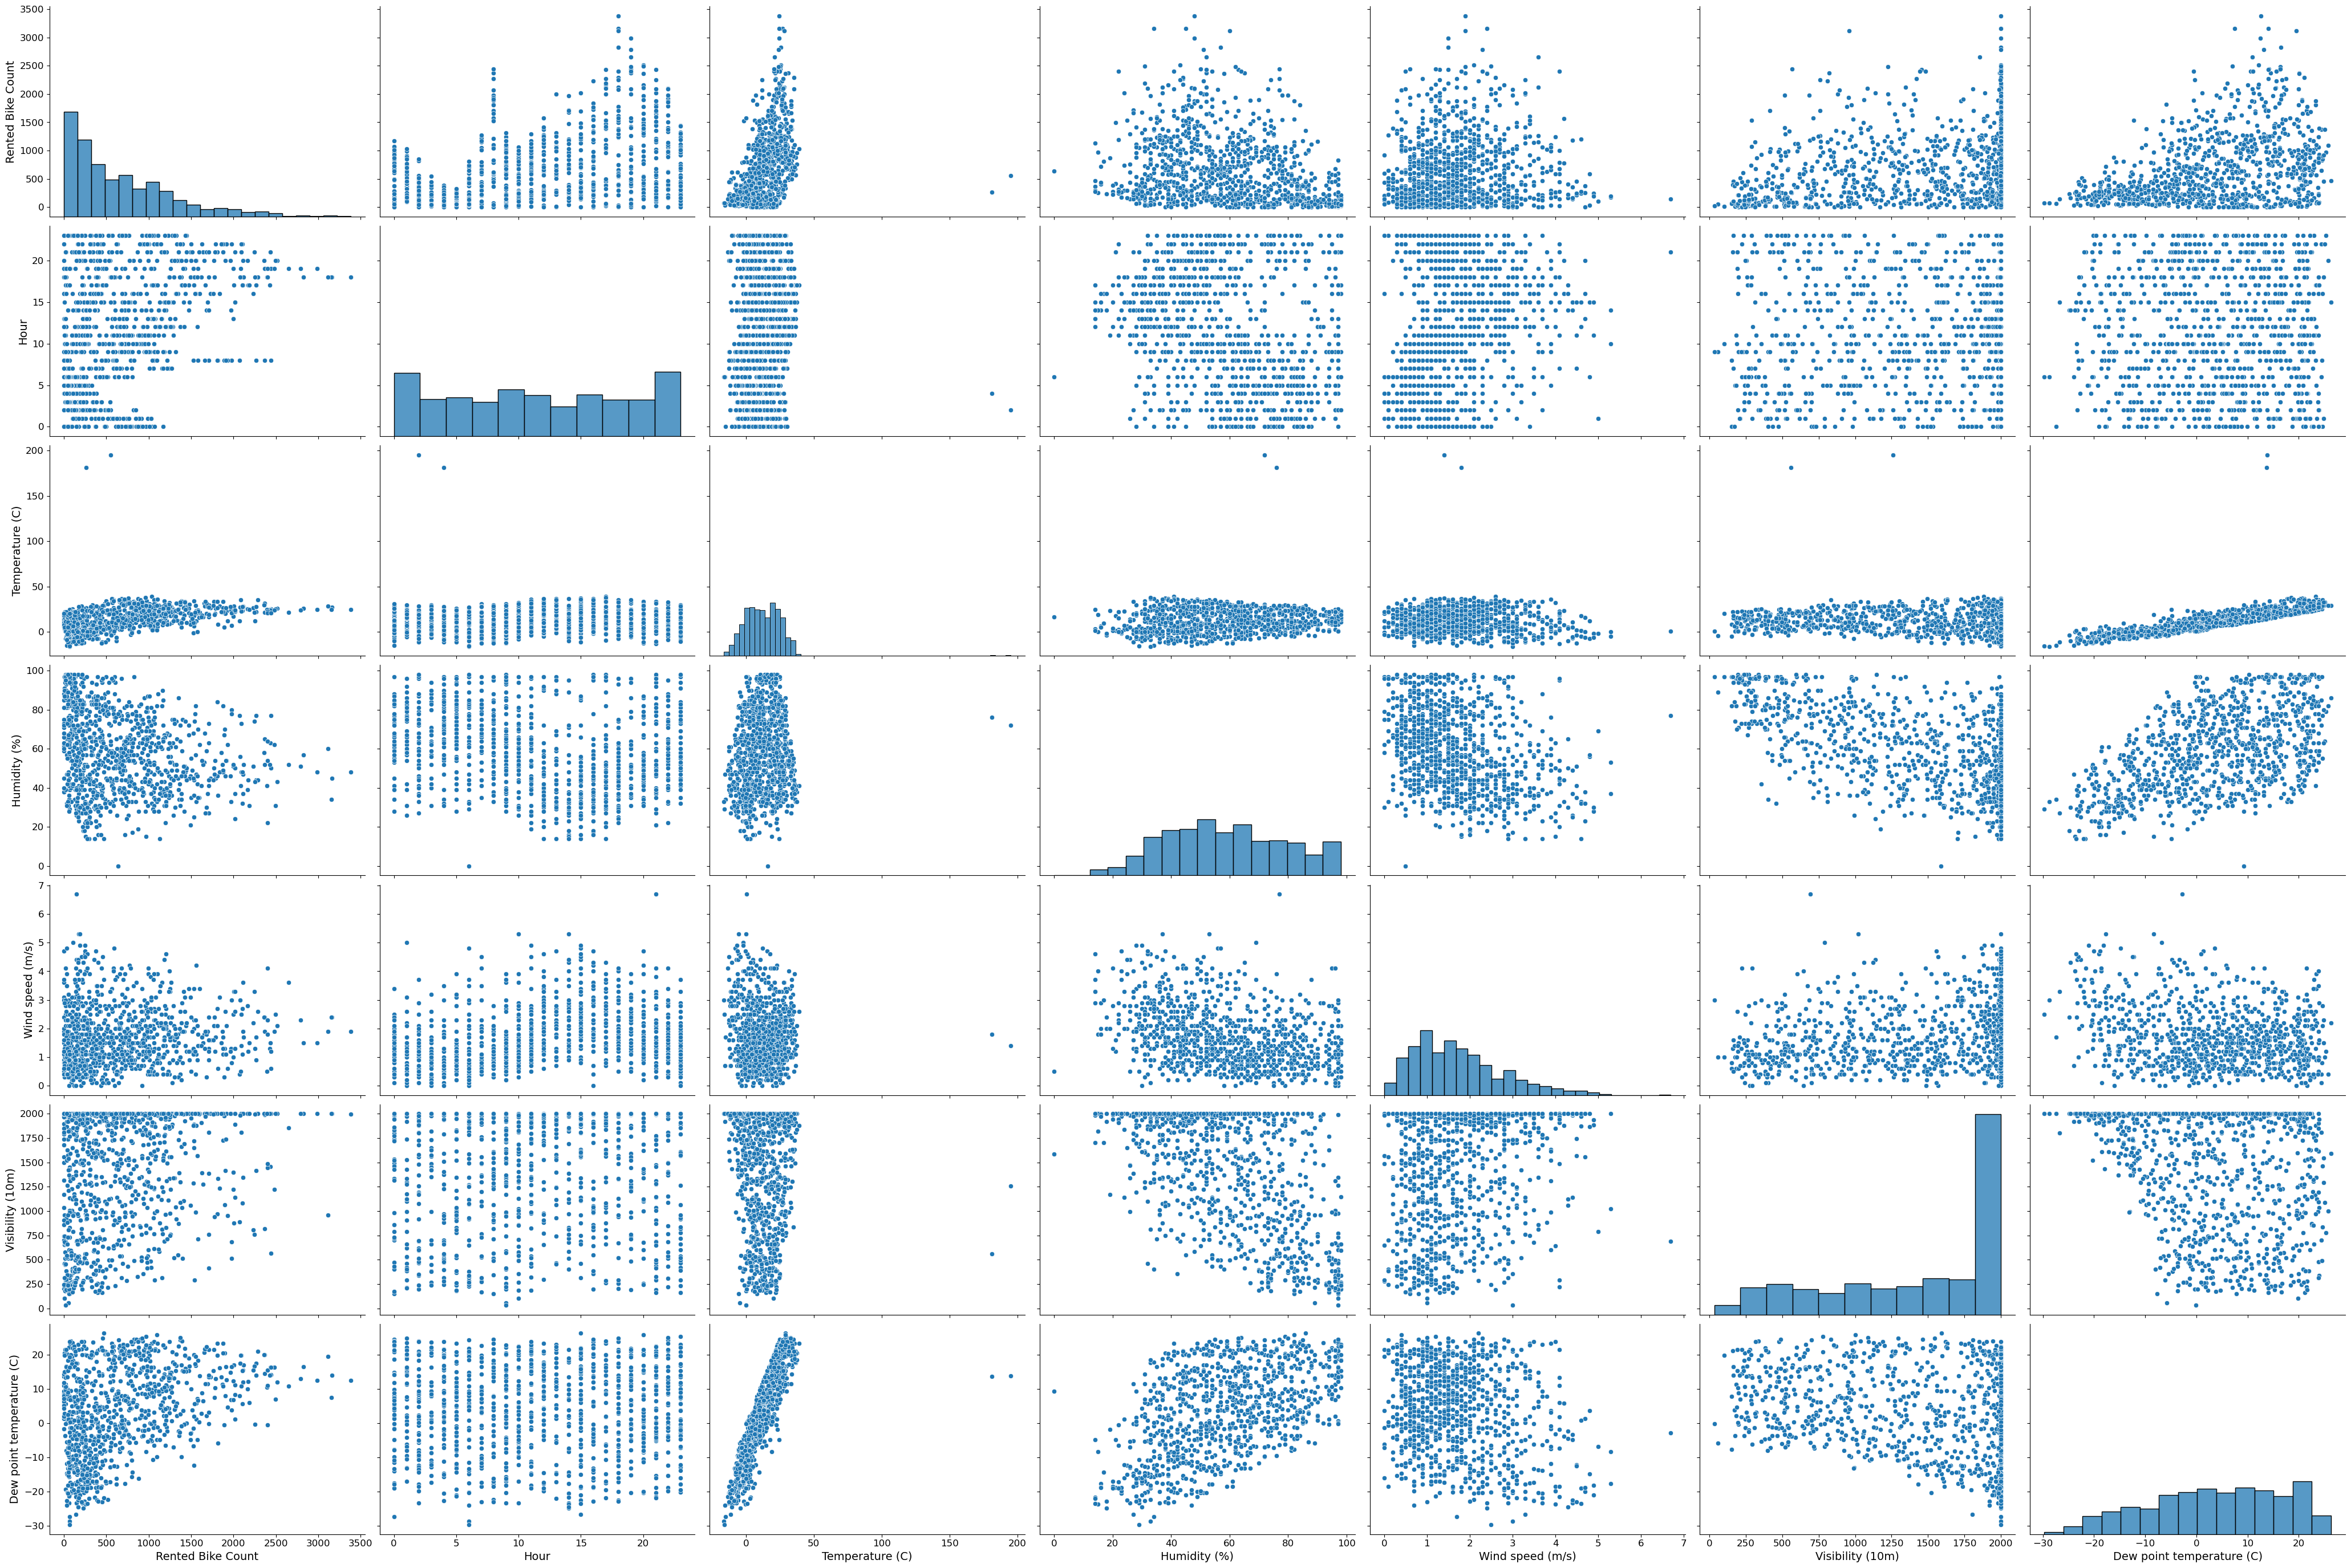

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming bike_rental is your DataFrame

# Increase default figure size
plt.rcParams['figure.figsize'] = [20, 10]

# Histograms for numerical features with binning
for column in bike_rental.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(bike_rental[column], bins=50, kde=True)  # Increase the number of bins
    plt.title(f'Distribution of {column}', fontsize=24)
    plt.ylabel('Frequency', fontsize=20)
    plt.xlabel(column, fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

# Bar plots for categorical features with subsampling
for column in bike_rental.select_dtypes(include=['object']).columns:
    plt.figure()
    if bike_rental[column].nunique() > 50:
        sample = bike_rental[column].value_counts().nlargest(50)  # Show top 50 categories
        sns.barplot(x=sample.index, y=sample.values)
    else:
        sns.countplot(x=bike_rental[column])
    plt.title(f'Count of {column}', fontsize=24)
    plt.ylabel('Count', fontsize=20)
    plt.xlabel(column, fontsize=20)
    plt.xticks(fontsize=18, rotation=90)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=18)
    plt.show()

# Specific plots for date, solar radiation, rainfall, and snowfall counts with aggregation
specific_columns = ['date', 'solar radiation', 'rainfall', 'snowfall']
for column in specific_columns:
    if column in bike_rental.columns:
        plt.figure()
        if column == 'date':
            bike_rental['date'] = pd.to_datetime(bike_rental['date'])
            bike_rental['year_month'] = bike_rental['date'].dt.to_period('M')
            sample = bike_rental['year_month'].value_counts().sort_index()
            sns.barplot(x=sample.index.astype(str), y=sample.values)
        else:
            sns.histplot(bike_rental[column], bins=50, kde=True)  # Increase the number of bins
        plt.title(f'Count of {column}', fontsize=24)
        plt.ylabel('Count', fontsize=20)
        plt.xlabel(column, fontsize=20)
        plt.xticks(fontsize=18, rotation=90 if column == 'date' else 0)
        plt.yticks(fontsize=18)
        plt.show()

# Scatter plot for numerical features relationships with subsampling
numerical_columns = bike_rental.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_columns) > 1:
    sample_size = min(1000, len(bike_rental))  # Sample up to 1000 points
    sample = bike_rental.sample(sample_size)
    sns.pairplot(sample[numerical_columns], height=4, aspect=1.5)
plt.show()



### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [7]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [8]:
### Your code here (and remember to upload the resulting csv)

# Step 1: Remove rows where 'Functioning Day' is 'No' and drop the column
bike_rental = bike_rental[bike_rental['Functioning Day'] == 'Yes']

# Deleting the Functioning Day feature from the df
bike_rental = bike_rental.drop(columns=['Functioning Day'])

# Verifying that Functioning Day feature has been deleted
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   float64
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   object 
 9   Rainfall(mm)               8465 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage:

In [9]:
# Step 2: One hot encode the 'Seasons' column
bike_rental = pd.get_dummies(bike_rental, columns=['Seasons'])

In [10]:
#step 3:Replace the date feature with a binary weekday feature
bike_rental['Weekday'] = bike_rental['Date'].transform(date_is_weekday)

# dropping Date feature since Weekday is the replacement
bike_rental = bike_rental.drop(['Date'], axis=1)

In [11]:
# verifying that Date feature was dropped and that the Weekday feature is successfully populated 
bike_rental.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
0,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
2,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1,1
3,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
4,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1,1


In [17]:
# following the convention from the workshop but using "apply" to apply the to_numeric function across all features (not just a single feature)
bike_rental['Holiday'] = bike_rental['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

# verifying that all data types are now numeric values
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Seasons_Autumn             8465 non-null   uint8  
 12  Seasons_Spring             8465 non-null   uint8  
 13  Seasons_Summer             8465 non-null   uint8

In [18]:
# in the column solar radiation, rainfall and snowfall has NAN value so we use this code to fill it.
columns_to_fill = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for column in columns_to_fill:
    bike_rental[column].fillna(bike_rental[column].mean(), inplace=True)

In [19]:
# checking if the data is cleaned.
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Seasons_Autumn             8465 non-null   uint8  
 12  Seasons_Spring             8465 non-null   uint8  
 13  Seasons_Summer             8465 non-null   uint8

Rented Bike Count: [    2     2     2 ...  3418  3556 90997]


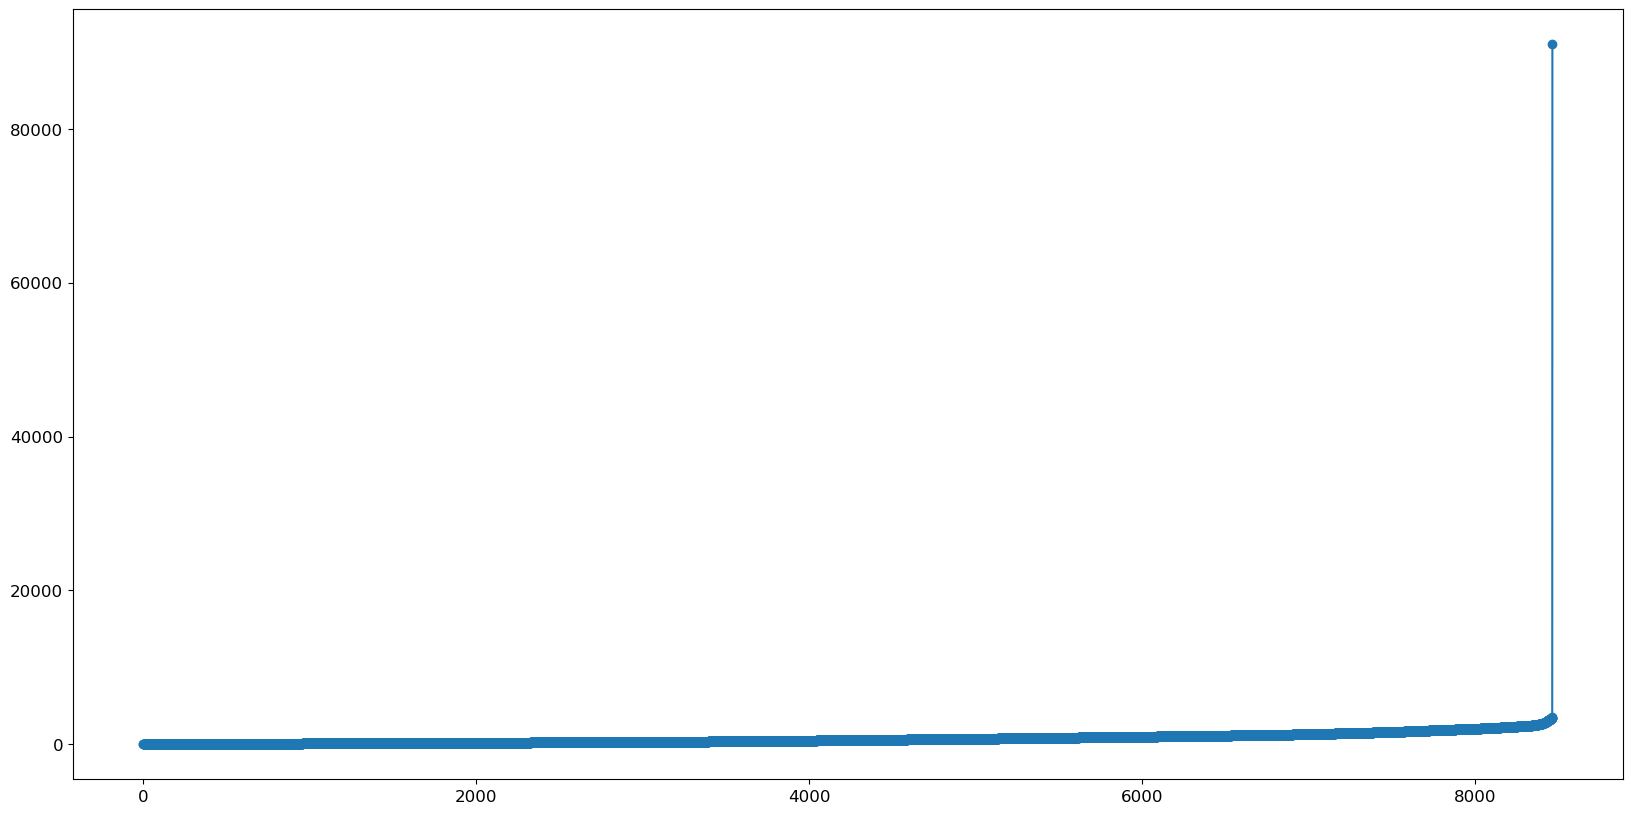

Hour: [ 0  0  0 ... 23 23 23]


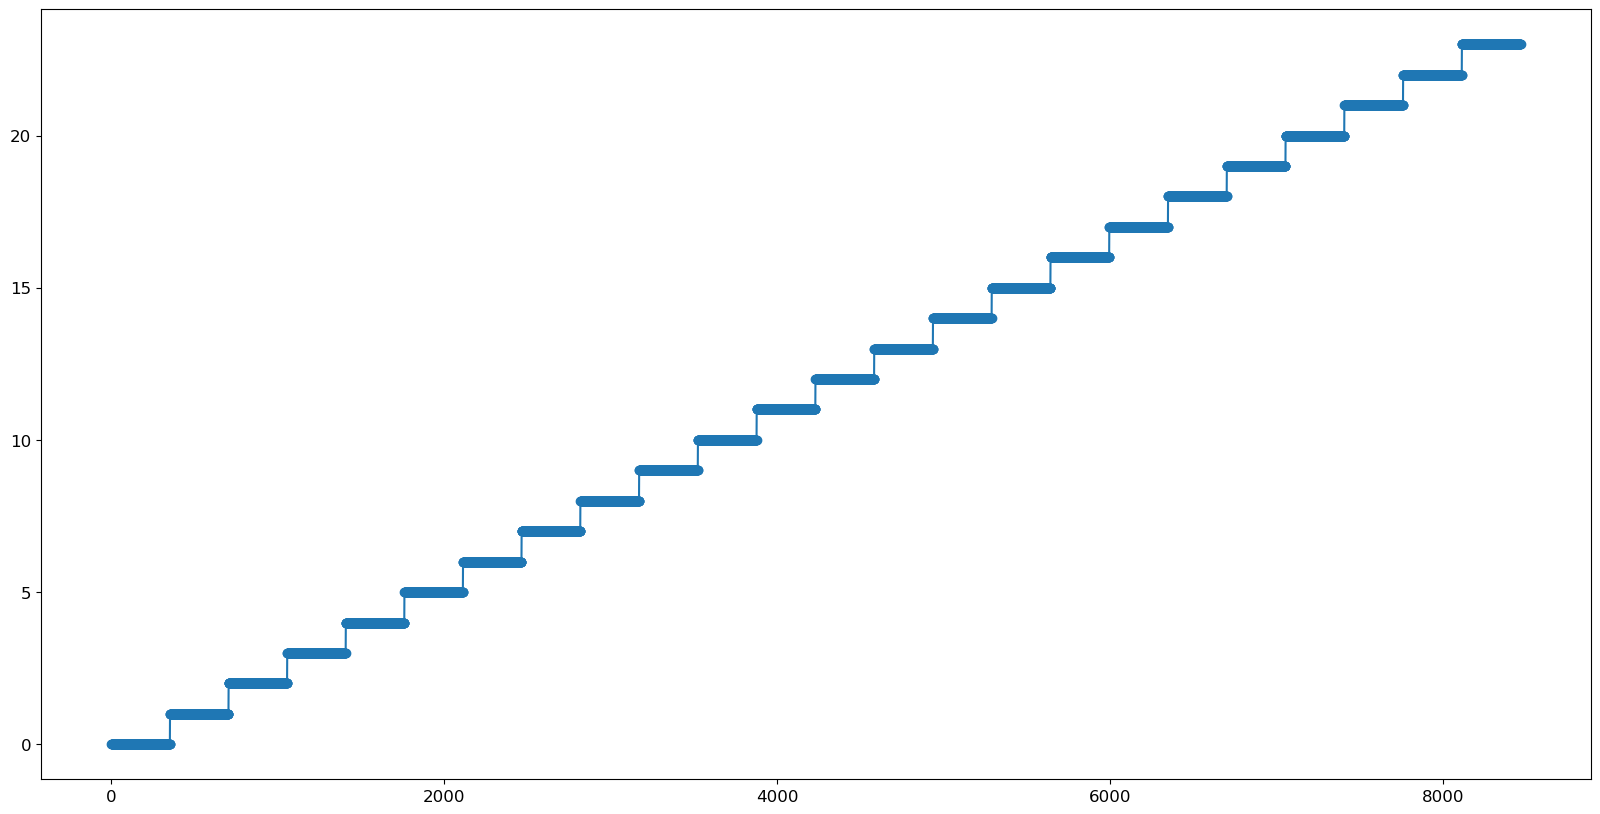

Temperature (C): [-17.8 -17.5 -17.5 ... 181.  186.  195. ]


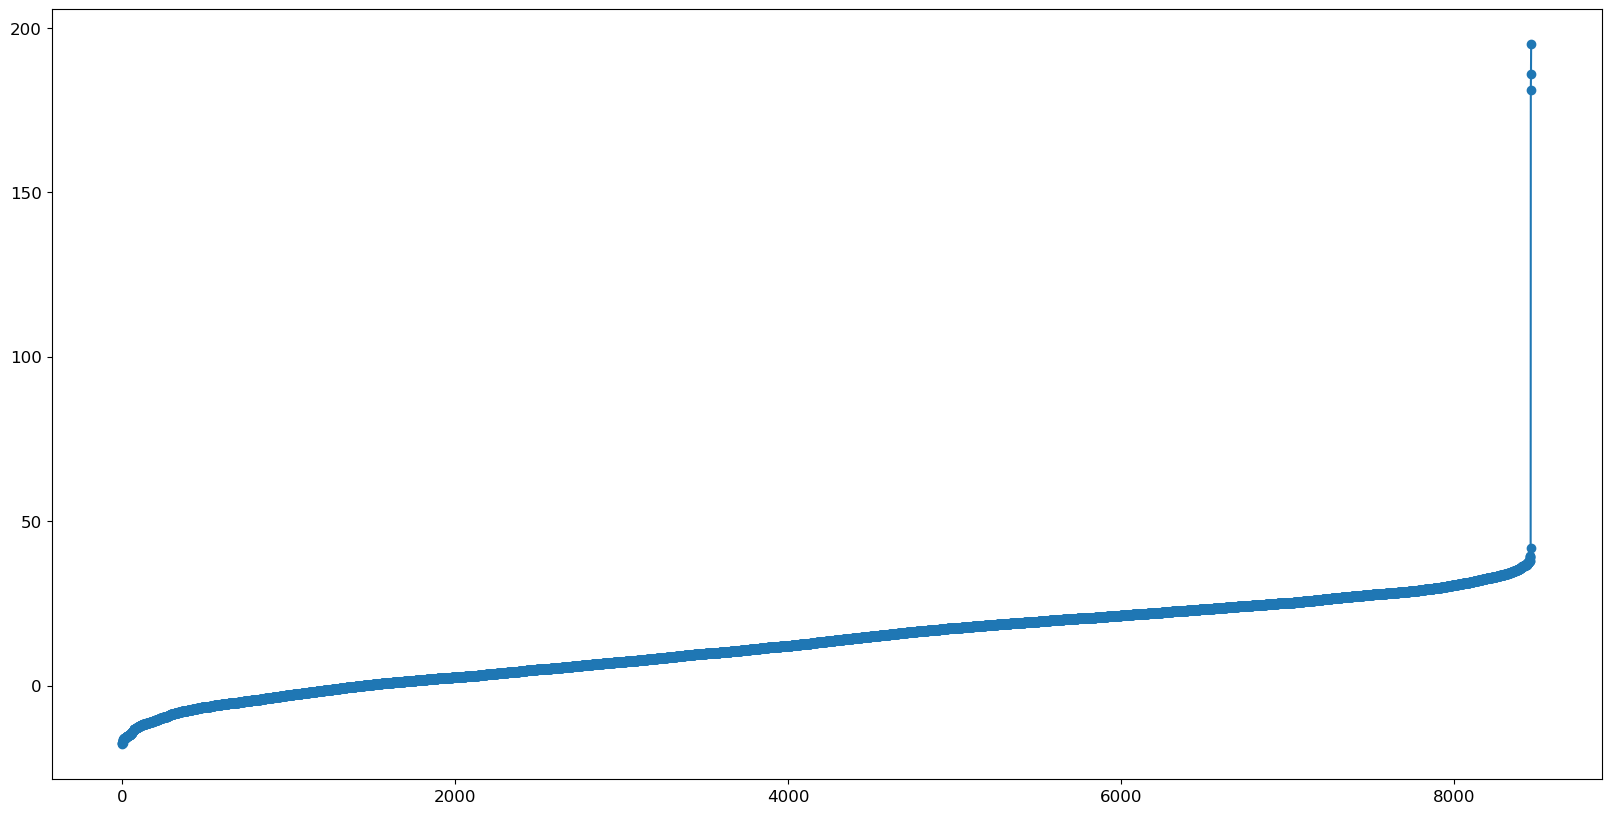

Humidity (%): [ -2.2   0.    0.  ...  98.   98.  455. ]


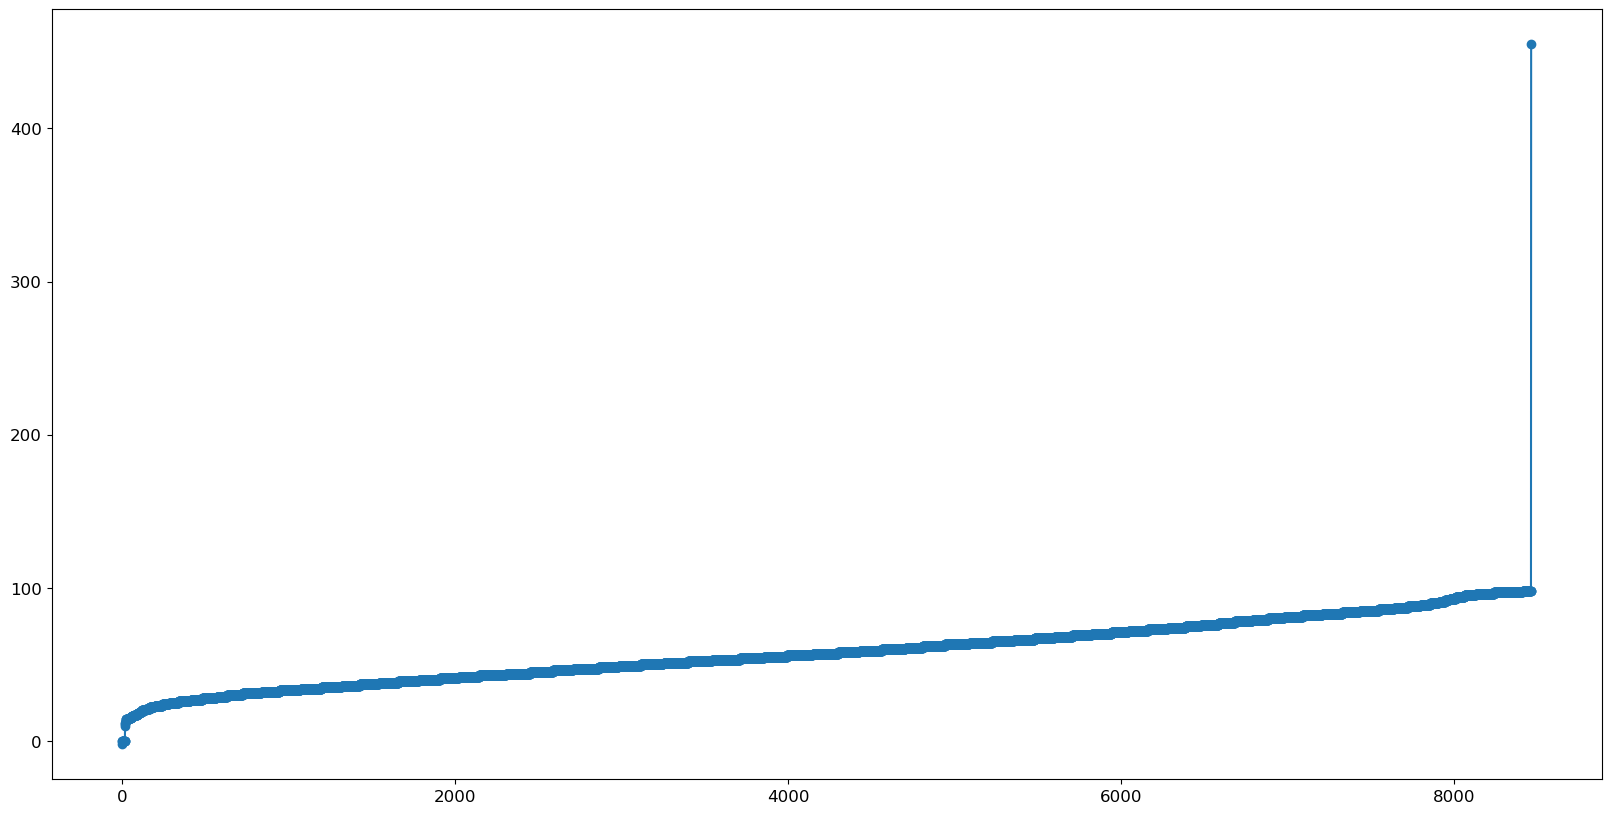

Wind speed (m/s): [-7.000e-01  0.000e+00  0.000e+00 ...  9.200e+00  9.180e+01  9.911e+02]


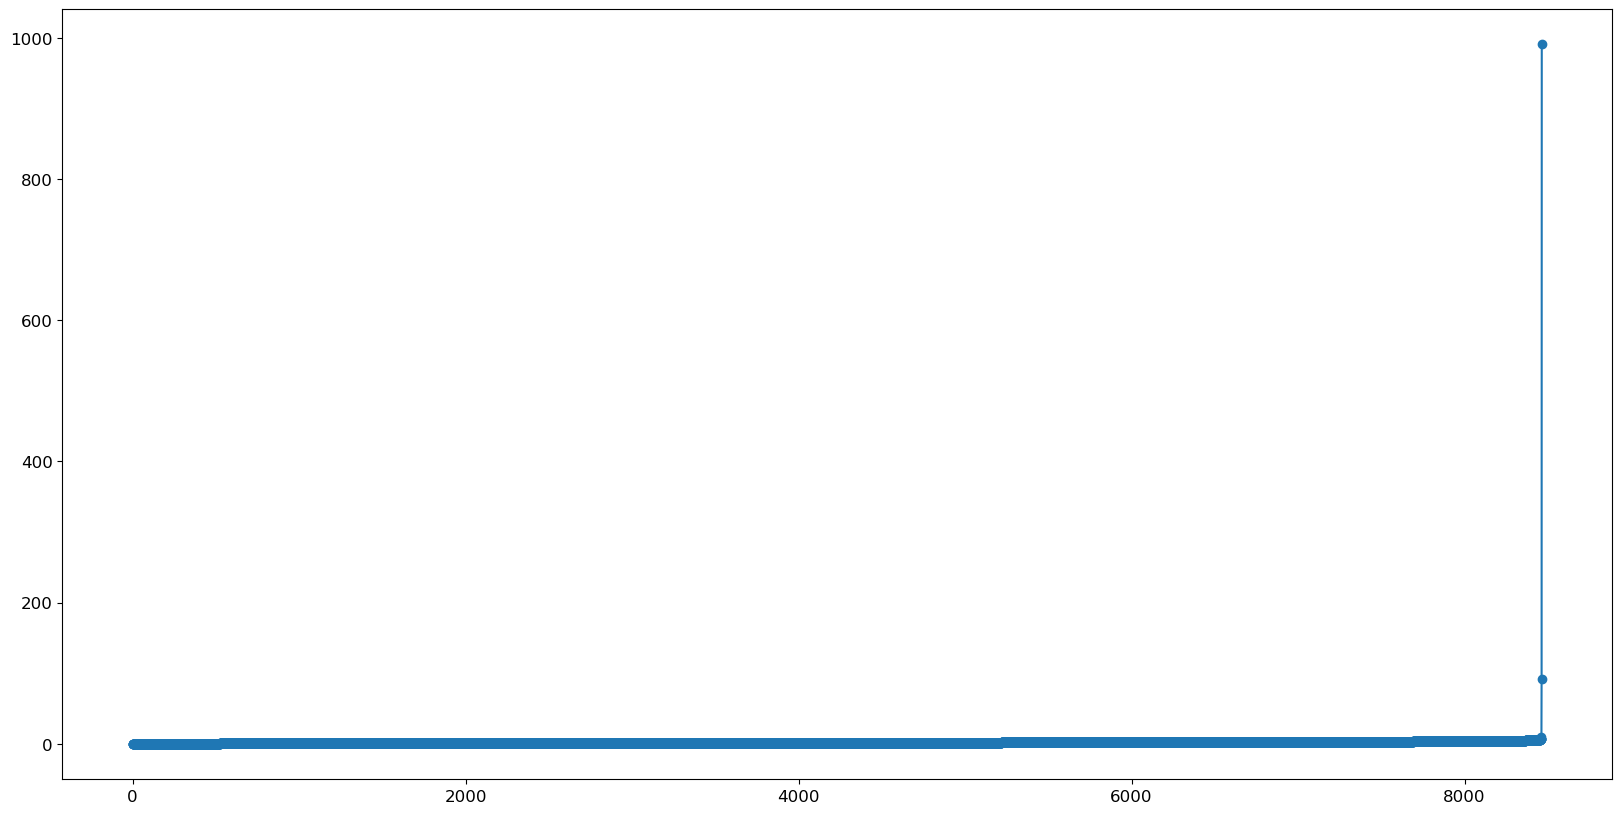

Visibility (10m): [  27   33   34 ... 2000 2000 2000]


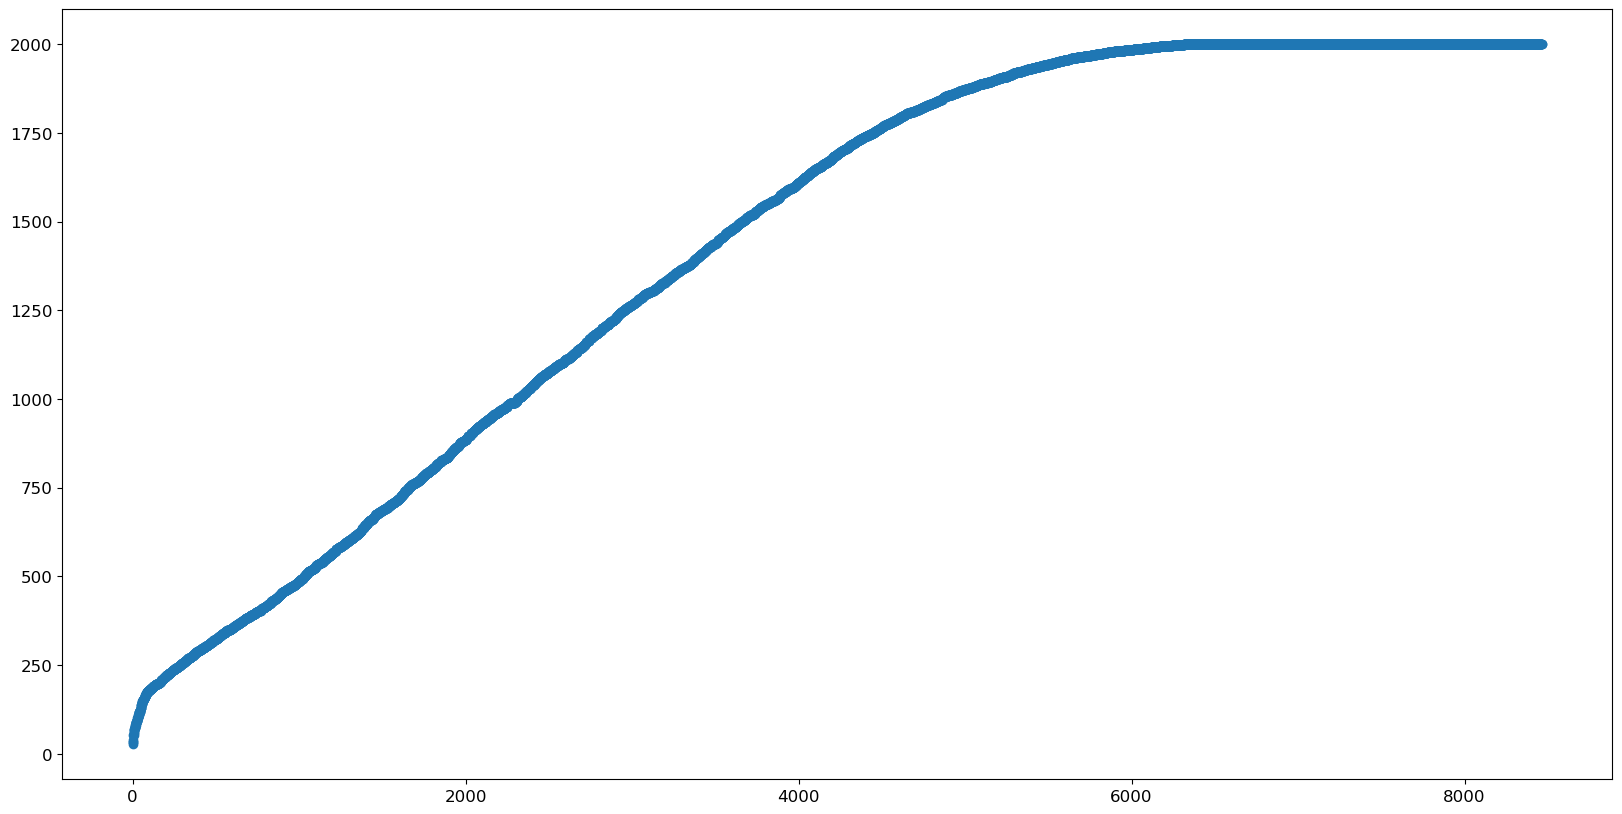

Dew point temperature (C): [-30.6 -30.5 -29.8 ...  26.8  26.8  27.2]


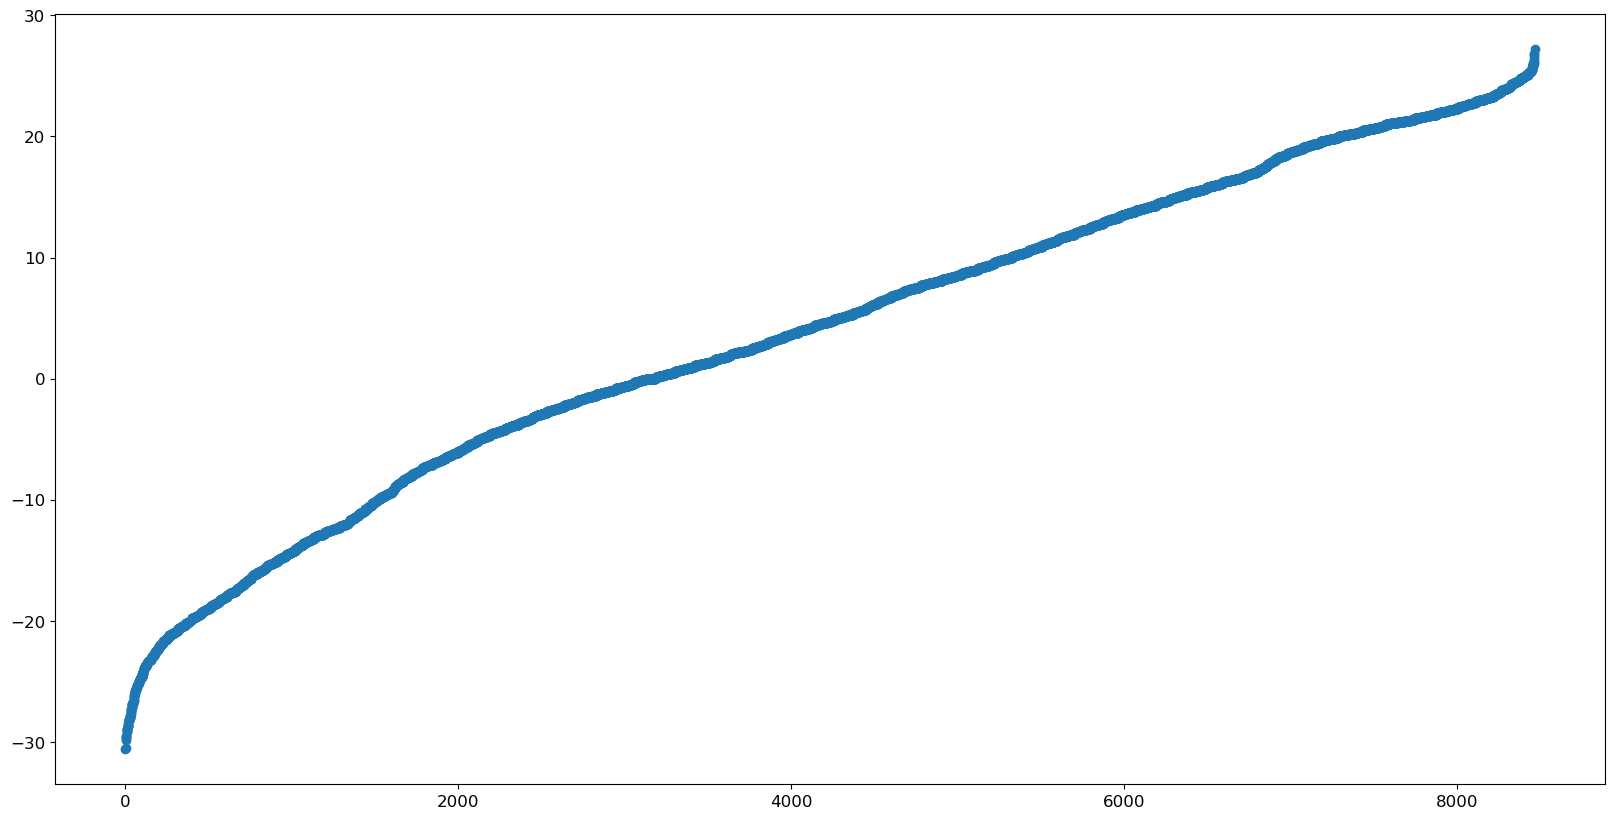

Solar Radiation (MJ/m2): [0.   0.   0.   ... 3.49 3.52 5.52]


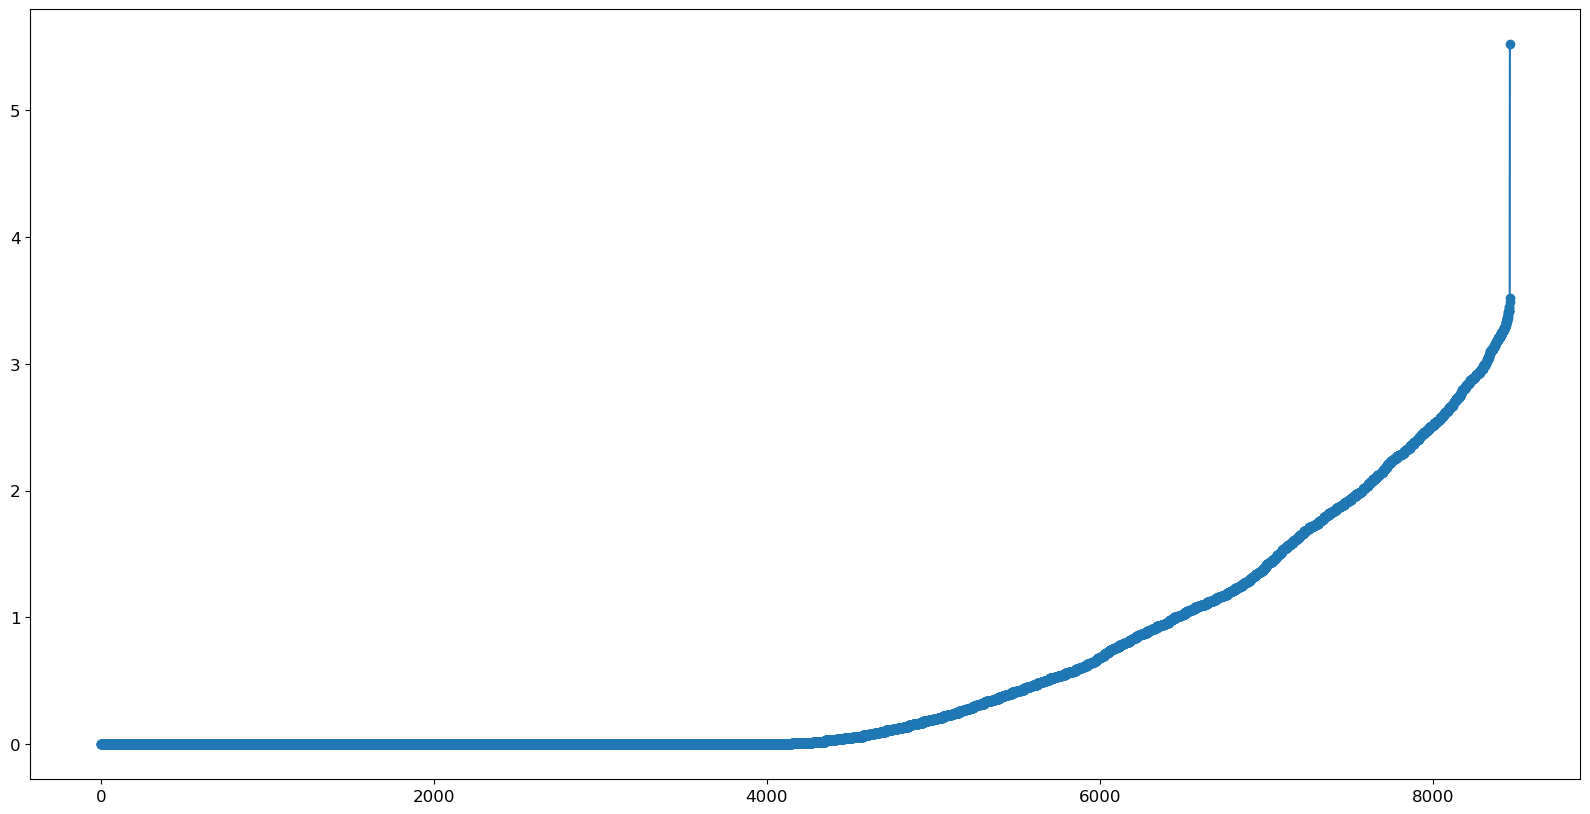

Rainfall(mm): [ 0.   0.   0.  ... 24.  29.5 35. ]


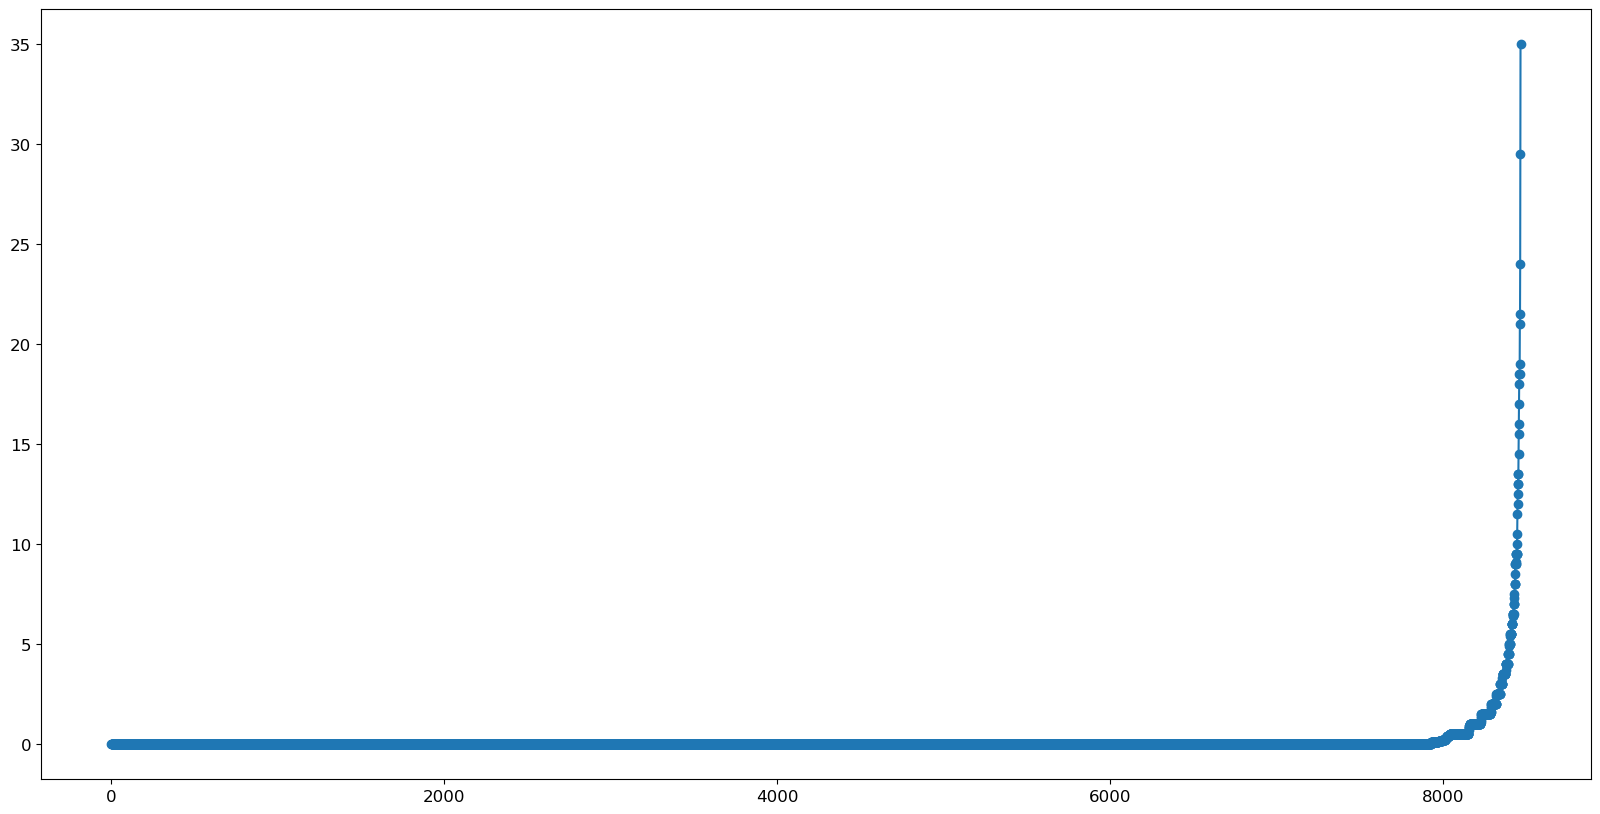

Snowfall (cm): [-0.4  0.   0.  ...  8.8  8.8 99. ]


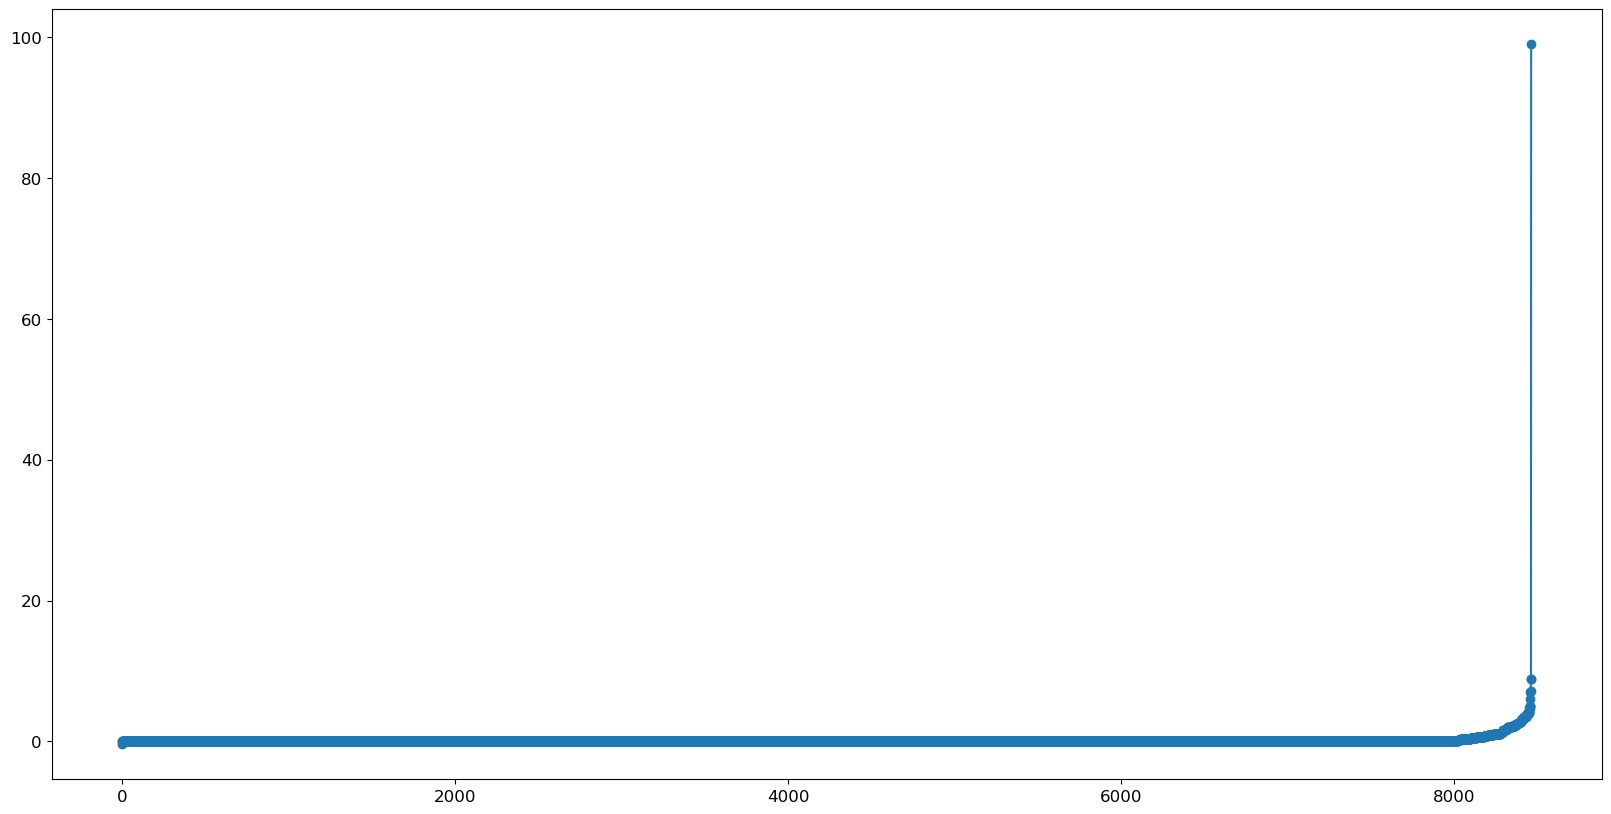

Holiday: [0 0 0 ... 0 0 0]


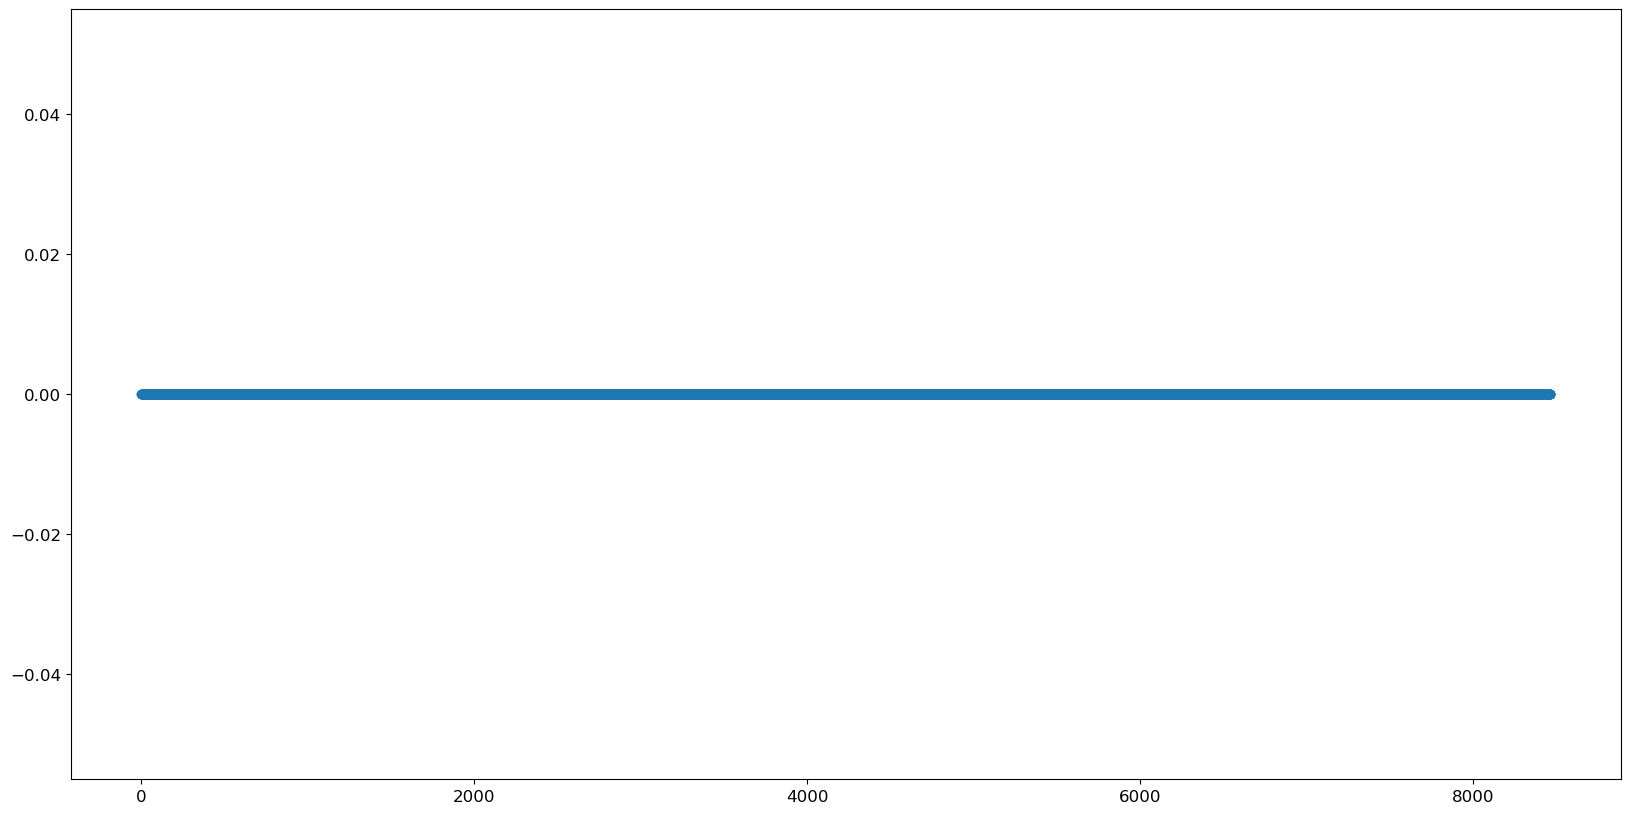

Seasons_Autumn: [0 0 0 ... 1 1 1]


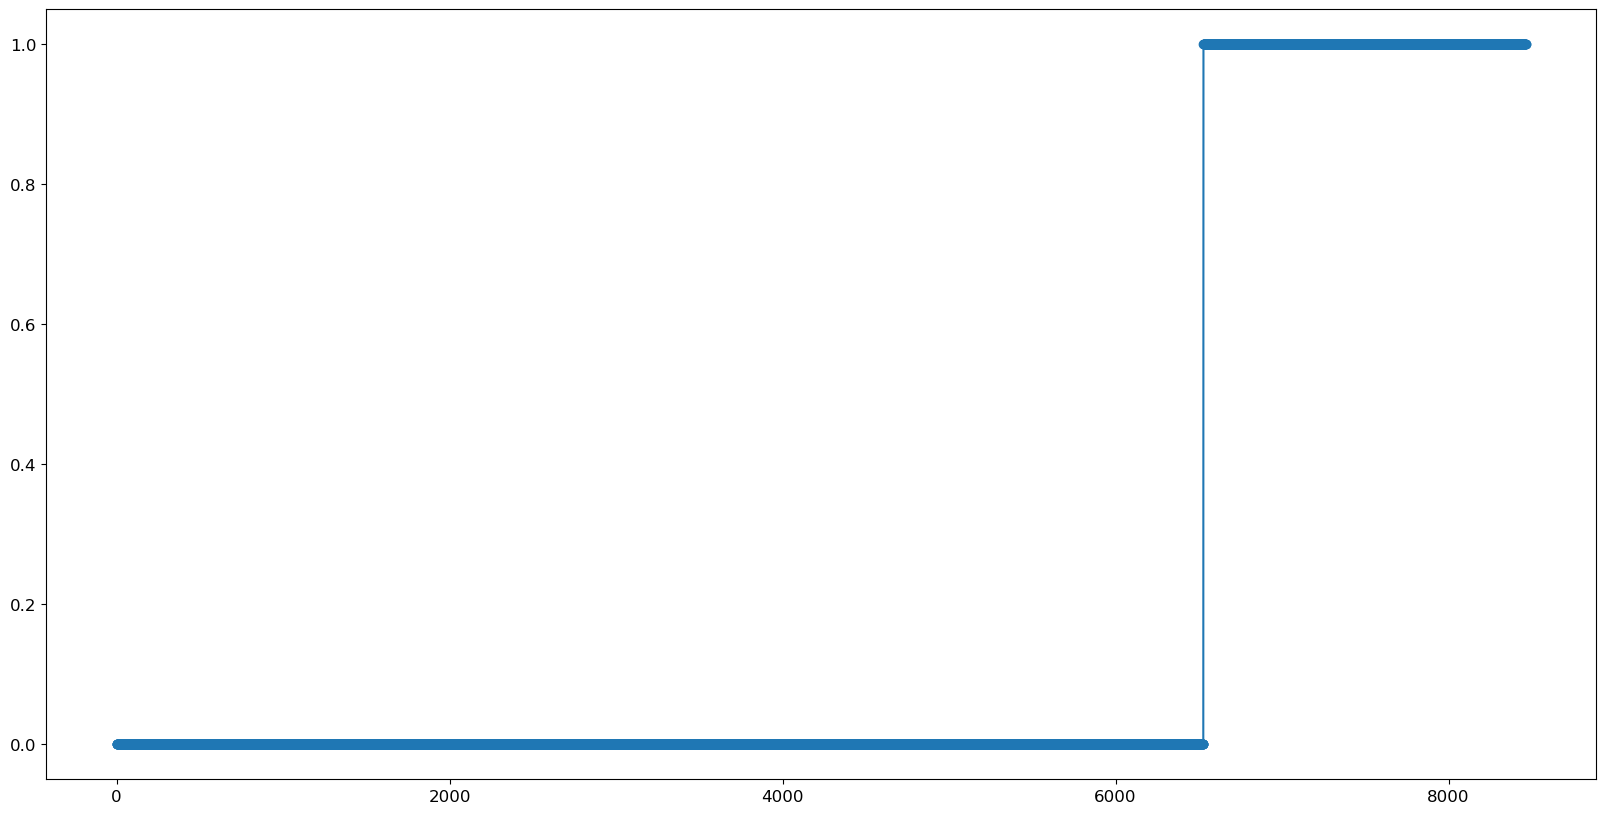

Seasons_Spring: [0 0 0 ... 1 1 1]


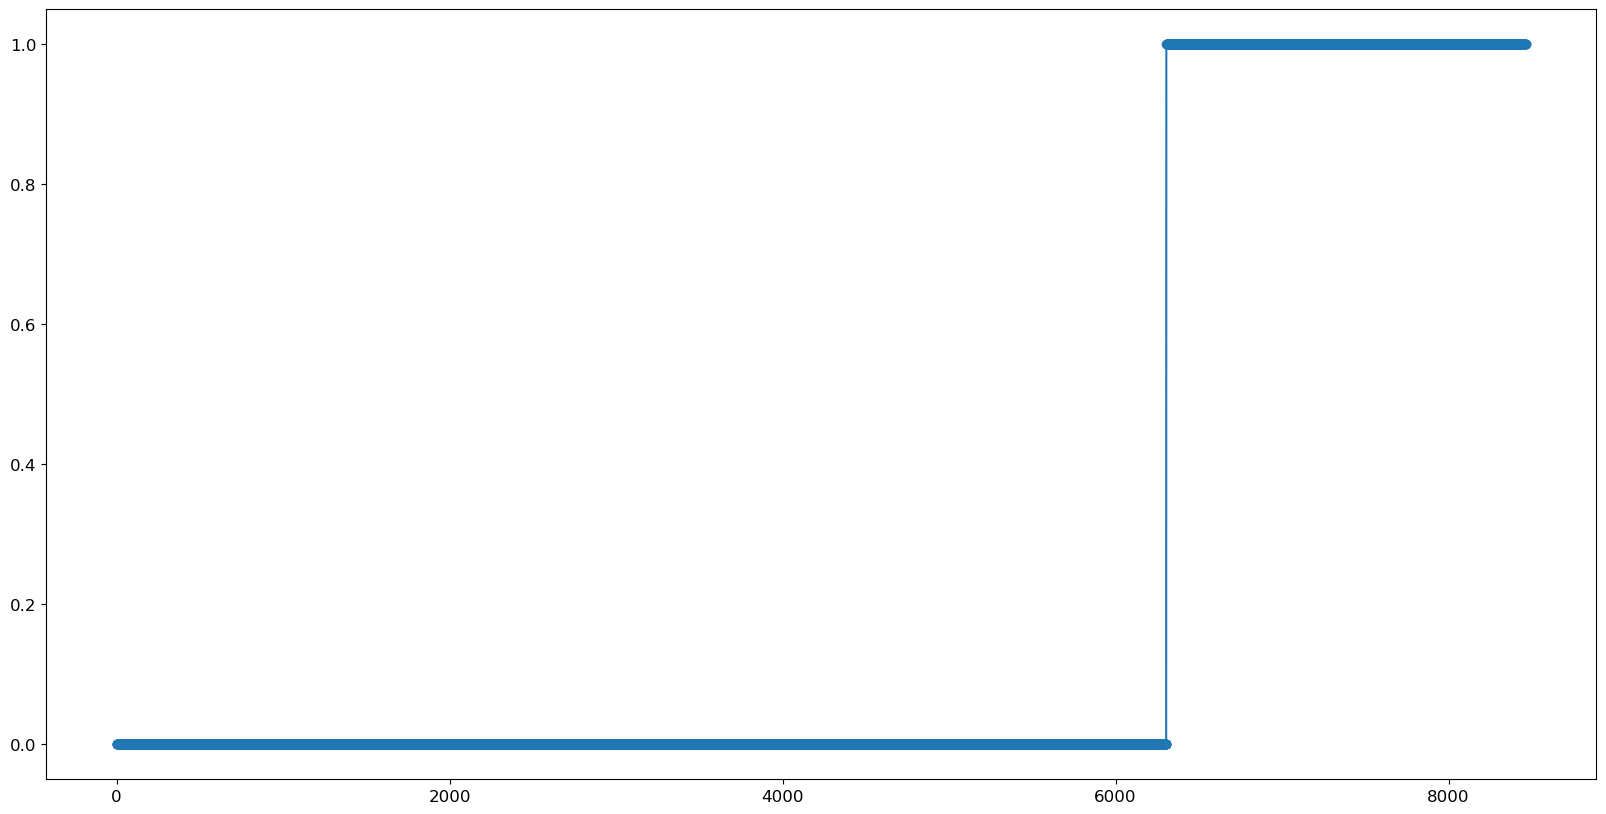

Seasons_Summer: [0 0 0 ... 1 1 1]


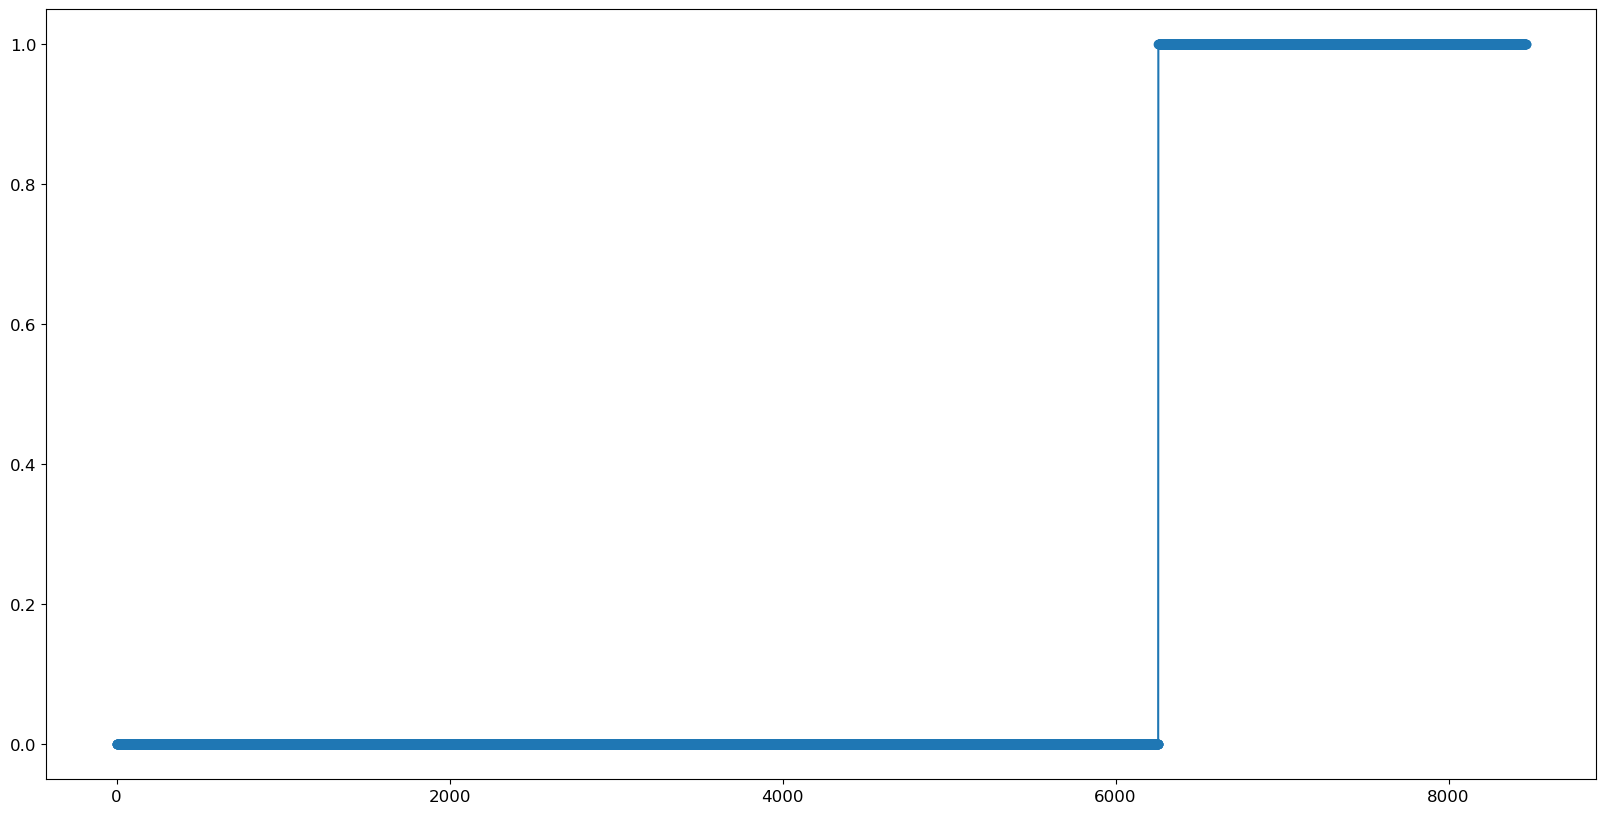

Seasons_Winter: [0 0 0 ... 1 1 1]


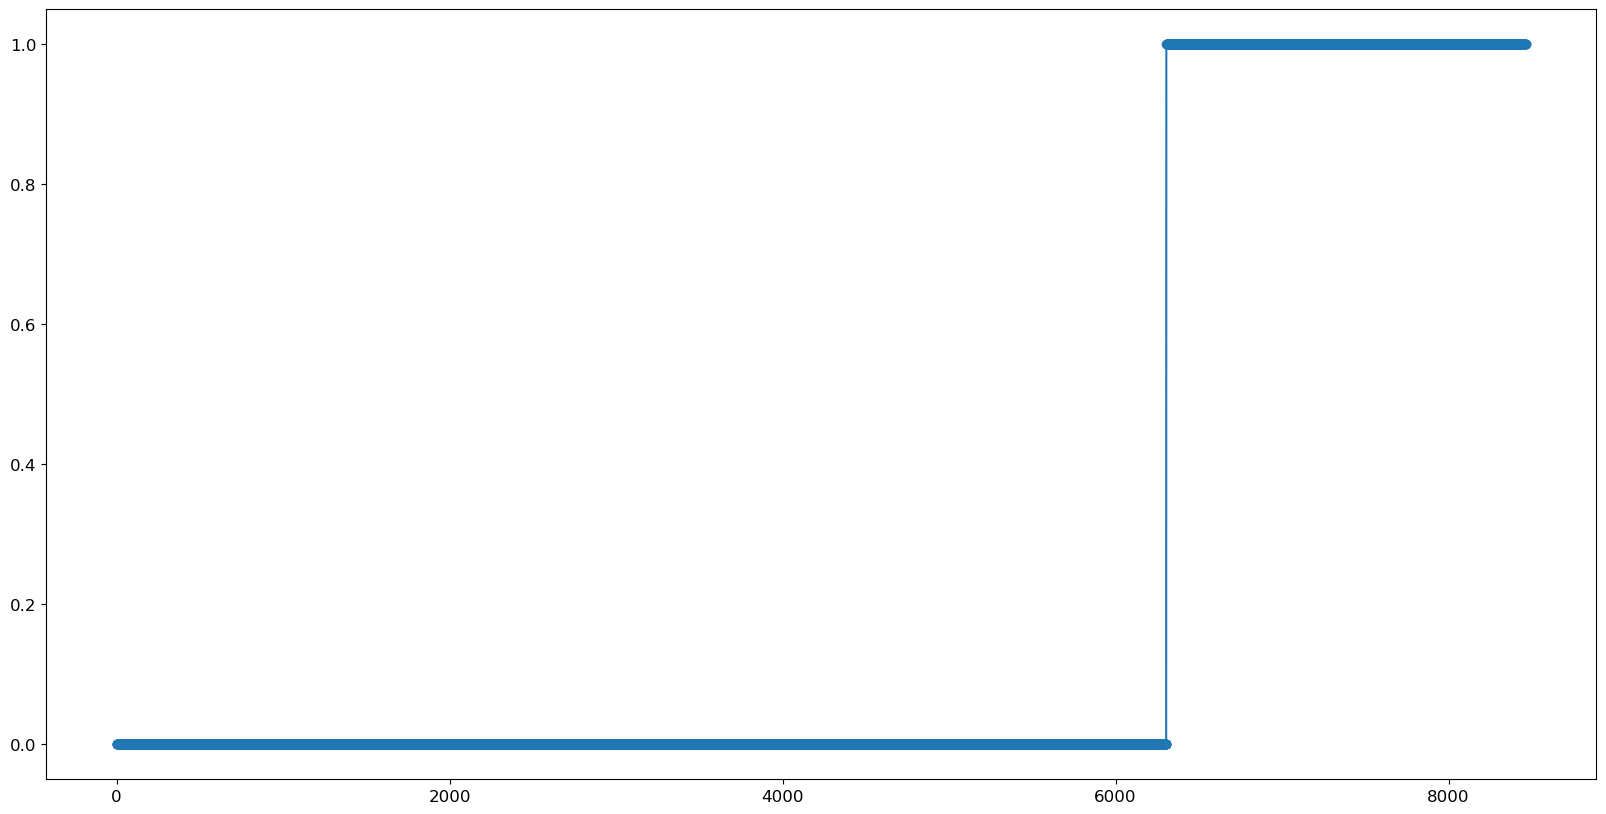

Weekday: [0 0 0 ... 1 1 1]


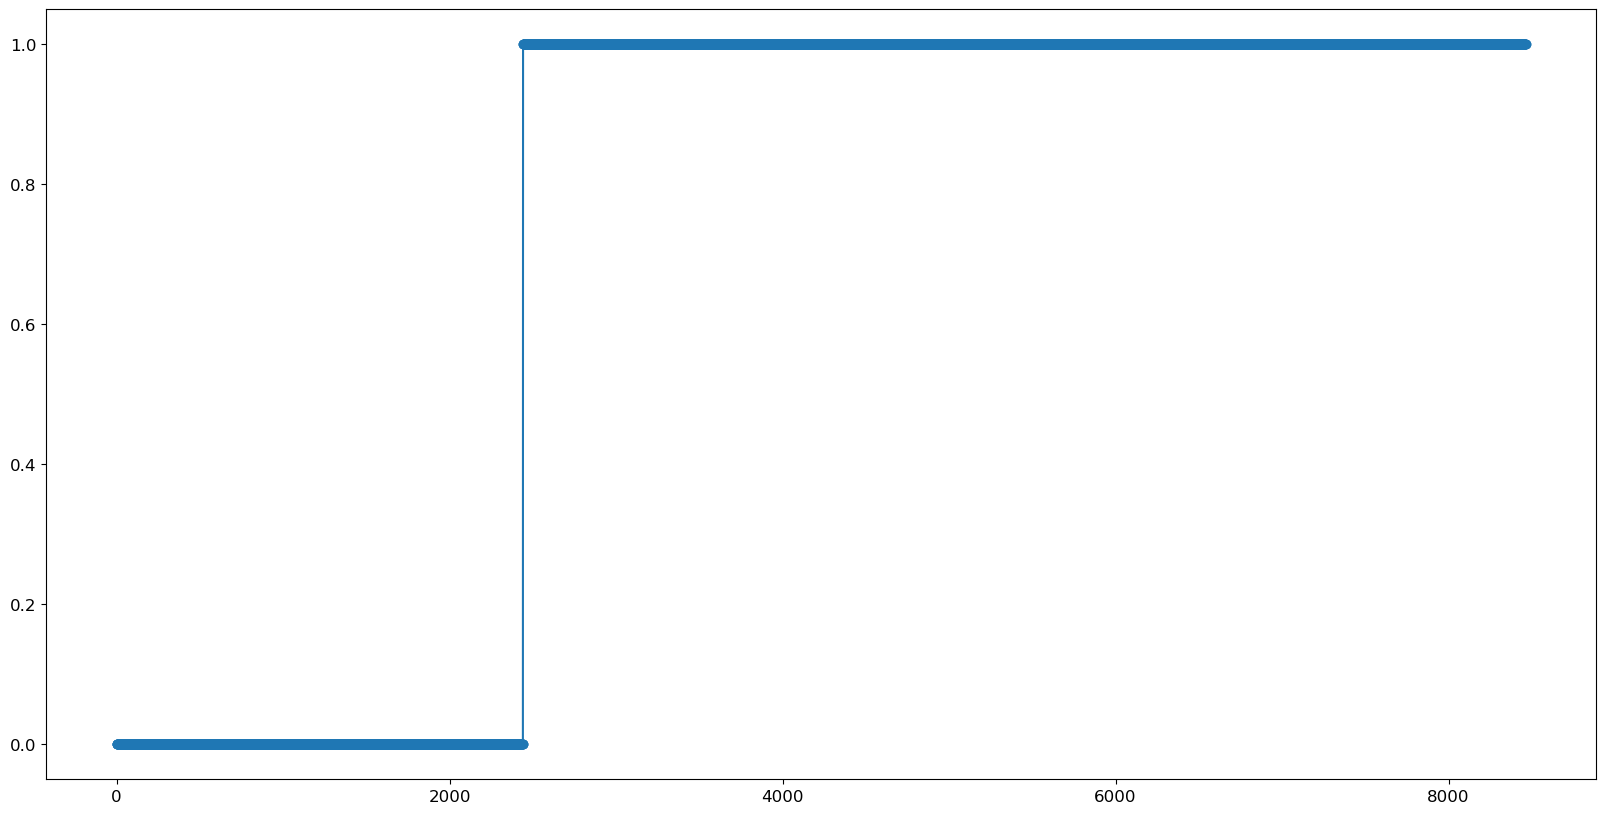

In [20]:
# (2) Visualize using sorted values

for feat in bike_rental.columns:
    print(f'{feat}: {np.sort(bike_rental.loc[:,feat])}')
    plt.plot(np.sort(bike_rental.loc[:,feat]),'-o')
    plt.show()

In [20]:
cleaned_data = 'D:/Documents/Data science/Machine learning tools/Assignment 1/CleanedSeoulBikeData.csv'
bike_rental.to_csv(cleaned_data, index=False)

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [21]:
### Your code here

#Verifying presence of NAN value
print(bike_rental.isna().sum())

Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature (C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Seasons_Autumn               0
Seasons_Spring               0
Seasons_Summer               0
Seasons_Winter               0
Weekday                      0
dtype: int64


In [22]:
# sklearn pipeline that will perform imputation

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# For the additional pre-processing actions, I am returning to address the problems outlined in Section 1 prior to executing the StandardScaler() function.
# Refer to the in-line comments below.
# Using a Customer Transformer combining guidance from the workshop (housing data) and Géron (68-69). I am replacing unusual values with np.nan,
# which then are converted to the median of a particular feature in the pipeline.

class CustomTransformer(BaseEstimator, TransformerMixin):
    # Based on my experimentation in later sections, 
    # I am including a parameter here to only include the features which appear to have the most correlation.
    # Please read additional commentary in Section 3 on outcome of both approaches (all features vs selecting features).
    def __init__(self, use_features=True):
       self.use_features = use_features

    def fit(self, bike_rental_data, y=None):
        return self
    
    def transform(self, bike_rental_data, y=None):

        bike_rental_data = bike_rental_data.copy()
        
        bike_rental_data.loc[bike_rental_data['Temperature (C)'] < -50, 'Temperature (C)'] = np.nan
        bike_rental_data.loc[bike_rental_data['Temperature (C)'] > 50, 'Temperature (C)'] = np.nan
        
        bike_rental_data.loc[bike_rental_data['Humidity (%)'] < 0, 'Humidity (%)'] = np.nan
        bike_rental_data.loc[bike_rental_data['Humidity (%)'] > 1100, 'Humidity (%)'] = np.nan
        
        bike_rental_data.loc[bike_rental_data['Wind speed (m/s)'] < 0, 'Wind speed (m/s)'] = np.nan
        bike_rental_data.loc[bike_rental_data['Wind speed (m/s)'] > 50, 'Wind speed (m/s)'] = np.nan

        bike_rental_data.loc[bike_rental_data['Visibility (10m)'] < 0, 'Visibility (10m)'] = np.nan
                
        if self.use_features:
            bike_rental_data = bike_rental_data[['Temperature (C)', 'Hour', 'Dew point temperature (C)', 'Winter']].copy()
            
        return bike_rental_data

bike_pipeline = Pipeline([
    ('custom_transformer', CustomTransformer(use_features=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [23]:
### Your code and outputs here
from sklearn.model_selection import train_test_split

# split the data (20% as test size)
train_set, test_set = train_test_split(bike_rental, test_size=0.2, random_state=42)

# separating Rented Bike Count as this is the value to predict
X_train = train_set.drop(["Rented Bike Count"], axis=1)
y_train = train_set["Rented Bike Count"].copy()
X_test = test_set.drop(["Rented Bike Count"], axis=1)
y_test = test_set["Rented Bike Count"].copy()

In [24]:
#pipeline that also include the linear regression model
from sklearn.linear_model import LinearRegression

#including ALL features
lr_pl_all = Pipeline([
    ('custom_transformer', CustomTransformer(use_features=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ('lr',LinearRegression())
])

#fit the training data 
lr_pl_all.fit(X_train, y_train)
y_pred_lr_all = lr_pl_all.predict(X_train)

#calculate the RMSE of the fit to the training data 
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_pred_lr_all,y_train))
print(f'LR RMSE Model (All w/o polynomial): {rmse_lr}')

#calculate RMSE if all predictions were equal to the mean of the training targets (bike rentals)
baseline = np.full(y_train.shape, y_train.mean())
rmse_bl = mean_squared_error(y_train, baseline, squared=False)
print(f'RMSE Baseline: {rmse_bl}')

LR RMSE Model (All w/o polynomial): 438.16549112642116
RMSE Baseline: 646.170499547999


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [2]:
### Your ChatGPT prompt

#Create and run code using sklearn pipelines to do the following:
# Fit a linear regression and a support vector regression model to the data using 10-fold cross-validation.
# Display the mean and standard deviation of the RMSE values for each model (at baseline).
# Perform hyper-parameter optimization on each model using GridSearchCV.
# Display the mean and standard deviation of the RMSE values for each model (after optimization).
# Choose the best model and visualize the results with a single graphic of your choice.


Baseline RMSE:
lr: Mean RMSE = 1.1417, Std RMSE = 0.2683
svr: Mean RMSE = 1.1620, Std RMSE = 0.3004

Optimized RMSE:
lr: Mean RMSE = 1.1417, Std RMSE = 0.2683
svr: Mean RMSE = 1.1101, Std RMSE = 0.2751


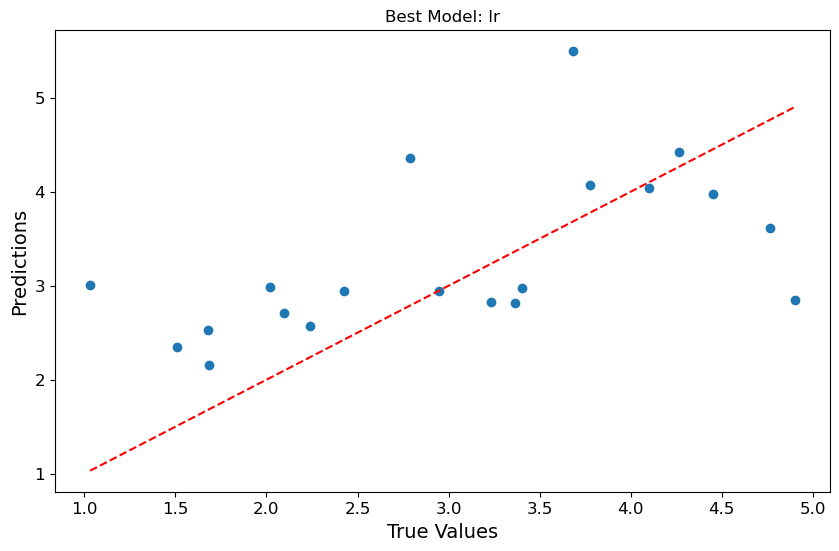

In [27]:
### Code here (with outputs)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset here
# For demonstration, I'll create a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.randn(100)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines
pipelines = {
    'lr': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'svr': Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
}

# Cross-validation and baseline performance
baseline_results = {}
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    baseline_results[name] = (cv_scores.mean(), cv_scores.std())

# Display baseline results
print("Baseline RMSE:")
for name, (mean, std) in baseline_results.items():
    print(f"{name}: Mean RMSE = {-mean:.4f}, Std RMSE = {std:.4f}")

# Hyper-parameter tuning
param_grids = {
    'lr': {},
    'svr': {'svr__C': [0.1, 1, 10], 'svr__gamma': [0.01, 0.1, 1]}
}

optimized_results = {}
best_estimators = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=10, scoring='neg_root_mean_squared_error')
    grid_search.fit(X_train, y_train)
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    optimized_results[name] = (cv_scores.mean(), cv_scores.std())
    best_estimators[name] = grid_search.best_estimator_

# Display optimized results
print("\nOptimized RMSE:")
for name, (mean, std) in optimized_results.items():
    print(f"{name}: Mean RMSE = {-mean:.4f}, Std RMSE = {std:.4f}")

# Choose the best model
best_model_name = min(optimized_results, key=lambda k: optimized_results[k][0])
best_model = best_estimators[best_model_name]

# Visualize the results
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Best Model: {best_model_name}')
plt.show()



## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [5]:
### Your answer here (maximum of 200 words)
# The error in the above code is the lack of handling missing values in data_cleaned, which can lead to issues during model 
# training if not addressed. Implementing fillna or dropna before splitting the data ensures robustness. An implementation detail 
# includes using n_jobs=-1 in GridSearchCV to leverage parallel processing, optimizing computational efficiency during 
# hyperparameter tuning. An alternative approach involves utilizing cross-validation within GridSearchCV instead of train_test_split alone, 
# providing more accurate estimates of model performance and reducing dependence on a single train-test split. These adjustments enhance 
# the reliability and efficiency of machine learning models, crucial for handling diverse datasets and achieving optimal model selection 
# and validation.